<a href="https://www.kaggle.com/code/ahmeterdemyenay/xai-applications-based-on-vehicle-characteristics?scriptVersionId=188770616" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# INTRODUCTION

- This project, titled "XAI Applications Based on Vehicle Characteristics for Reducing CO2 Emissions," explores the critical issue of carbon emissions from vehicles, a major contributor to environmental degradation and climate change. The primary objective is to identify which vehicle characteristics most significantly impact CO2 emissions using classical machine learning models combined with explainable artificial intelligence (XAI) methods.

- The research begins with a detailed data collection process, focusing on a dataset encompassing various vehicle attributes over a 29-year period (1995-2023), sourced from the Canadian government's [Open Government Portal](https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64). The dataset includes features such as engine size, fuel type, and transmission type, which are hypothesized to influence CO2 emissions.

- The methodology involves multiple stages of data preprocessing, exploratory analysis, and the application of machine learning models like Random Forest, Gradient Boosting, and Support Vector Regression (SVR). To enhance the interpretability of these models, XAI techniques such as SHAP (SHapley Additive exPlanations), LIME (Local Interpretable Model-agnostic Explanations), and ALIBI (integrating Tree SHAP) are employed. These methods provide insights into how different vehicle characteristics affect emissions, allowing for a clearer understanding of the underlying patterns and influences.

- Key findings highlight that combined fuel consumption consistently emerges as the most significant factor affecting CO2 emissions across all models. The study also demonstrates that modern vehicle attributes and manufacturing technologies contribute to lower emissions, with a noticeable improvement in newer models.

- This research is my original work, and it is shared with the intention that it may be cited and used for further research and development. By sharing this study on platforms like Kaggle and GitHub, the aim is to provide valuable data, methodologies, and insights to the broader scientific and engineering communities. This open access will facilitate further studies, enable replication of results, and foster innovation in reducing vehicle-related carbon emissions. Ultimately, the goal is to support policy development and technological advancements that promote environmental sustainability and combat climate change.

<font color = 'blue' >
Content: 
    
1. [Importing Libraries and Dataset](#1)
2. [Data Exploration](#2)
    * [Column Types Mapping & Checking Null Values](#3)
    * [Find out CO2 rating and Smog Rating](#4)
    * [Defining Similar Values](#5)
    * [Unique Values of Categorical Values](#6)
3. [Data Visualization](#7)
4. [Feature Engineering](#8)
    * [Frequency Encoding](#9)
    * [One-Hot Encoding](#10)
5. [Random Forest (Regression)](#11)
    * [Independent Variables (features) - Target Value](#12)
    * [Model and Predictions](#13)
    * [Performance](#14)
    * [Top 20 Errors](#15)
6. [Random Forest - LIME](#16)
7. [Random Forest - SHAP](#17)
8. [Random Forest - ALIBI](#18)
9. [Gradient Boosting](#19)
10. [Gradient Boosting - SHAP](#20)
11. [Gradient Boosting - LIME](#21)
12. [Gradient Boosting - ALIBI](#22)
13. [Support Vector Regression](#23)
    * [Visualising errors for MSE](#24)
    * [Visualising errors for R2](#25)
14. [Support Vector Regression - SHAP](#26)
15. [Support Vector Regression - LIME](#27)
16. [Conclusion](#28)


# Importing Libraries and Dataset 
<a id = "1"></a>

- In this section, we import the necessary libraries and load the dataset. The dataset spans 29 years (1995-2023) and includes various vehicle characteristics such as engine size, fuel type, transmission type, and CO2 emissions.

In [1]:
!pip install alibi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.1/522.1 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 16.5 MB/s eta 0:00:00


In [2]:
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.1 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.9
    Uninstalling jupyterlab-widgets-3.0.9:
      Successfully uninstalled jupyterlab-widgets-3.0.9
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, max_error
from pandas.plotting import scatter_matrix
from IPython.display import Markdown, display
from lime.lime_tabular import LimeTabularExplainer
import shap
import alibi
import lime
import lime.lime_tabular
from alibi.explainers import TreeShap

# Display settings
pd.set_option('display.max_columns', None)

# Ignore warnings
warnings.filterwarnings("ignore")

# Print filenames in /kaggle/input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(filename)

2024-07-18 05:26:51.004047: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-18 05:26:51.004158: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-18 05:26:51.141280: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


MY1995-2023-Fuel-Consumption-Ratings.csv


In [4]:
# Read csv data into a DataFrame
df = pd.read_csv('/kaggle/input/my1995-2023-fuel-consumption-ratings/MY1995-2023-Fuel-Consumption-Ratings.csv')
df.head()

ModelYear   Make         Model VehicleClass  EngineSize_L  Cylinders  \
0       1995  ACURA       INTEGRA   SUBCOMPACT           1.8          4   
1       1995  ACURA       INTEGRA   SUBCOMPACT           1.8          4   
2       1995  ACURA  INTEGRA GS-R   SUBCOMPACT           1.8          4   
3       1995  ACURA        LEGEND      COMPACT           3.2          6   
4       1995  ACURA  LEGEND COUPE      COMPACT           3.2          6   

  Transmission FuelType  FuelConsCity_L100km  FuelConsHwy_L100km  Comb_L100km  \
0           A4        X                 11.6                 8.3         10.1   
1           M5        X                 11.0                 8.3          9.8   
2           M5        Z                 10.8                 8.3          9.7   
3           A4        Z                 14.2                10.5         12.5   
4           A4        Z                 14.6                11.0         13.0   

   Comb_mpg  CO2Emission_g_km  CO2Rating  SmogRating  
0        28               232        NaN         NaN  
1        29               225        NaN         NaN  
2        29               223        NaN         NaN  
3        23               288        NaN         NaN  
4        22               299        NaN         NaN

# Data Exploration
<a id = "2"></a>

## - Column Types Mapping & Checking Null Values
<a id = "3"></a>

- The preprocessing process was started by first checking the column types and checking whether null values existed. As can be seen, there are no null values in any columns except the CO2 and Smog Rating columns. There are 18991 null values in the CO2 Rating column and 20101 null values in the Smog Rating column. Considering the total number of data, this corresponds to approximately 70% and 74%, respectively.

In [5]:
column_type_mapping = {'ModelYear': int, 'Make': str, 'Model': str, 'VehicleClass': str, 'EngineSize_L': float, 'Cylinders': int,
                       'Transmission': str, 'FuelType': str, 'FuelConsCity_L100km': float, 'FuelConsHwy_L100km': float, 'Comb_L100km': float,
                       'Comb_mpg': int, 'CO2Emission_g_km': int}

df = df.astype(column_type_mapping)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27001 entries, 0 to 27000
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ModelYear            27001 non-null  int64  
 1   Make                 27001 non-null  object 
 2   Model                27001 non-null  object 
 3   VehicleClass         27001 non-null  object 
 4   EngineSize_L         27001 non-null  float64
 5   Cylinders            27001 non-null  int64  
 6   Transmission         27001 non-null  object 
 7   FuelType             27001 non-null  object 
 8   FuelConsCity_L100km  27001 non-null  float64
 9   FuelConsHwy_L100km   27001 non-null  float64
 10  Comb_L100km          27001 non-null  float64
 11  Comb_mpg             27001 non-null  int64  
 12  CO2Emission_g_km     27001 non-null  int64  
 13  CO2Rating            8010 non-null   float64
 14  SmogRating           6900 non-null   float64
dtypes: float64(6), int64(4), object(5)
m

In [6]:
df.isnull().sum()

ModelYear                  0
Make                       0
Model                      0
VehicleClass               0
EngineSize_L               0
Cylinders                  0
Transmission               0
FuelType                   0
FuelConsCity_L100km        0
FuelConsHwy_L100km         0
Comb_L100km                0
Comb_mpg                   0
CO2Emission_g_km           0
CO2Rating              18991
SmogRating             20101
dtype: int64

In [7]:
df['ModelYear'].value_counts()

ModelYear
2015    1132
2016    1110
2009    1096
2012    1091
2011    1085
2018    1083
2013    1082
2008    1079
2014    1071
2017    1058
2019    1056
2007    1043
2010    1030
2005    1019
2020     975
2021     970
2006     968
2022     959
2004     898
1995     841
2003     820
2023     799
2002     740
1996     698
1999     688
2001     679
1997     658
2000     639
1998     634
Name: count, dtype: int64

## - Find out CO2 rating and Smog rating
<a id = "4"></a>

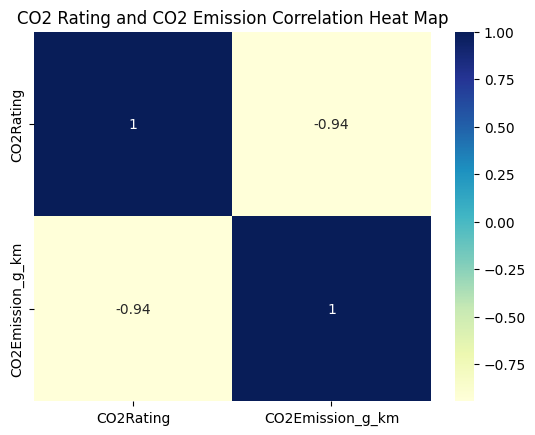

In [8]:
# Calculating Correlation Matrix
correlation_matrix = df[['CO2Rating', 'CO2Emission_g_km']].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title("CO2 Rating and CO2 Emission Correlation Heat Map")
plt.show()

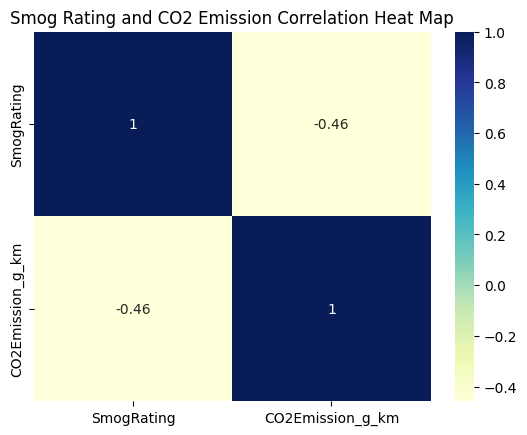

In [9]:
# Calculating Correlation Matrix
corr_matrix_smog = df[['SmogRating', 'CO2Emission_g_km']].corr()

# Heatmap
sns.heatmap(corr_matrix_smog, annot=True, cmap="YlGnBu")
plt.title("Smog Rating and CO2 Emission Correlation Heat Map")
plt.show()

- Since the null value rates are so high in the CO2 Rating and Smog Rating columns, dropping these columns at this stage will make data analysis and CO2 emission predictions easier to handle in the following stages.

In [10]:
df.drop(columns=["CO2Rating", "SmogRating"], inplace=True)

In [11]:
df.describe()

ModelYear  EngineSize_L     Cylinders  FuelConsCity_L100km  \
count  27001.000000  27001.000000  27001.000000         27001.000000   
mean    2009.999630      3.347661      5.837154            13.841687   
std        7.938602      1.342770      1.803504             3.743247   
min     1995.000000      0.800000      2.000000             4.000000   
25%     2004.000000      2.300000      4.000000            11.300000   
50%     2010.000000      3.000000      6.000000            13.400000   
75%     2017.000000      4.200000      8.000000            15.900000   
max     2023.000000      8.400000     16.000000            33.300000   

       FuelConsHwy_L100km   Comb_L100km      Comb_mpg  CO2Emission_g_km  
count        27001.000000  27001.000000  27001.000000      27001.000000  
mean            10.010014     12.117559     24.933669        275.524129  
std              2.589578      3.186844      6.731678         65.881966  
min              3.900000      4.000000     10.000000         94.000000  
25%              8.200000      9.900000     20.000000        230.000000  
50%              9.500000     11.600000     24.000000        268.000000  
75%             11.400000     13.900000     29.000000        315.000000  
max             22.100000     27.500000     71.000000        633.000000

## - Defining Similar Values
<a id = "5"></a>

- Inconsistent values in the 'Vehicle Class' and 'Make' columns were standardized to ensure uniformity, improving the dataset's reliability for subsequent analysis.

In [12]:
# Get unique values in the 'VehicleClass' column
unique_vehClass = sorted(df['VehicleClass'].unique())

# Print unique values one after the other
for vehClass in unique_vehClass:
    print(vehClass)

COMPACT
Compact
FULL-SIZE
Full-size
MID-SIZE
MINICOMPACT
MINIVAN
Mid-size
Minicompact
Minivan
PICKUP TRUCK - SMALL
PICKUP TRUCK - STANDARD
Pickup truck: Small
Pickup truck: Standard
SPECIAL PURPOSE VEHICLE
STATION WAGON - MID-SIZE
STATION WAGON - SMALL
SUBCOMPACT
SUV
SUV - SMALL
SUV - STANDARD
SUV: Small
SUV: Standard
Special purpose vehicle
Station wagon: Mid-size
Station wagon: Small
Subcompact
TWO-SEATER
Two-seater
UL
VAN - CARGO
VAN - PASSENGER
Van: Passenger


In [13]:
# Define rules for correcting similar values
correction_rules = {
    'COMPACT': 'Compact',
    'FULL-SIZE': 'Full-size',
    'MID-SIZE': 'Mid-size',
    'MINICOMPACT': 'Minicompact',
    'MINIVAN': 'Minivan',
    'SUBCOMPACT': 'Subcompact',
    'SPECIAL PURPOSE VEHICLE': 'Special purpose vehicle',
    'TWO-SEATER': 'Two-seater',
    'PICKUP TRUCK - STANDARD': 'Pickup truck: Standard',
    'PICKUP TRUCK - SMALL': 'Pickup truck: Small',
    'STATION WAGON - MID-SIZE': 'Station wagon: Mid-size',
    'STATION WAGON - SMALL': 'Station wagon: Small',
    'SUV - SMALL': 'SUV: Small',
    'SUV - STANDARD': 'SUV: Standard',
    'SUV': 'SUV: Standard',
    'VAN - PASSENGER': 'Van: Passenger',
    'VAN - CARGO': 'Van: Cargo'
}

# Update the VehicleClass column in the data frame according to the correction rules
df['VehicleClass'] = df['VehicleClass'].replace(correction_rules)

In [14]:
df['Make'].value_counts()

Make
CHEVROLET     2094
BMW           1672
FORD          1660
GMC           1634
DODGE         1097
              ... 
Bugatti         12
ALFA ROMEO      10
GENESIS          4
SRT              4
BUGATTI          3
Name: count, Length: 90, dtype: int64

In [15]:
# Capitalise all values in the "Make" column in the data frame for correcting similar values
df['Make'] = df['Make'].str.upper()

In [16]:
df['Make'].value_counts()

Make
CHEVROLET        2548
FORD             2202
BMW              1672
GMC              1634
MERCEDES-BENZ    1414
DODGE            1255
TOYOTA           1232
PORSCHE          1025
AUDI              926
VOLKSWAGEN        917
NISSAN            894
MAZDA             762
HONDA             665
JEEP              639
HYUNDAI           638
VOLVO             612
SUBARU            610
KIA               555
LEXUS             508
CHRYSLER          501
CADILLAC          485
MINI              431
JAGUAR            416
PONTIAC           390
BUICK             334
MITSUBISHI        329
ACURA             310
INFINITI          307
SUZUKI            260
SAAB              252
LINCOLN           247
LAND ROVER        237
SATURN            216
RAM               164
BENTLEY           163
MASERATI          142
ROLLS-ROYCE       126
LAMBORGHINI       117
ASTON MARTIN      113
FERRARI            88
PLYMOUTH           88
FIAT               86
OLDSMOBILE         79
MERCURY            57
GENESIS            51
ALFA 

## - Unique Values of categorical values
<a id = "6"></a>

- We explored unique values in categorical columns to understand the diversity of data and identify any inconsistencies that needed correction.

In [17]:
# Get unique values in the 'VehicleClass' column
unique_vehClass = sorted(df['VehicleClass'].unique())

# Print unique values one after the other
for vehClass in unique_vehClass:
    print(vehClass)

Compact
Full-size
Mid-size
Minicompact
Minivan
Pickup truck: Small
Pickup truck: Standard
SUV: Small
SUV: Standard
Special purpose vehicle
Station wagon: Mid-size
Station wagon: Small
Subcompact
Two-seater
UL
Van: Cargo
Van: Passenger


In [18]:
df['VehicleClass']. nunique()

17

In [19]:
# Get unique values in the 'Transmission' column
unique_transmission = sorted(df['Transmission'].unique())

# Print unique values one after the other
for transmission in unique_transmission:
    print(transmission)

A10
A3
A4
A5
A6
A7
A8
A9
AM5
AM6
AM7
AM8
AM9
AS10
AS4
AS5
AS6
AS7
AS8
AS9
AV
AV1
AV10
AV6
AV7
AV8
M4
M5
M6
M7


In [20]:
df['Transmission']. nunique()

30

In [21]:
# Get unique values in the 'FuelType' column
unique_FuelType = sorted(df['FuelType'].unique())

# Print unique values one after the other
for FuelType in unique_FuelType:
    print(FuelType)

D
E
N
X
Z


In [22]:
df['FuelType']. nunique()

5

- These categorical values can be done with one-hot encoding for ML models later.

# Data Visualization
<a id = "7"></a>

- Exploratory data analysis (EDA) provided insights into the relationships between different vehicle characteristics and CO2 emissions. Key findings included the positive relationship between the number of engine cylinders and fuel consumption, and the impact of different fuel types on CO2 emissions.

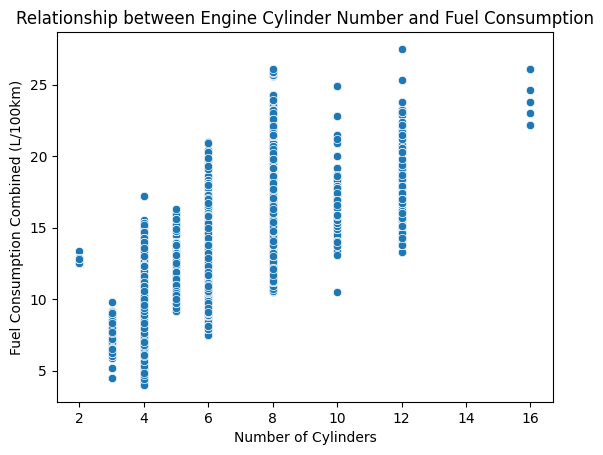

In [23]:
# Scatter plot: Effect of Engine Cylinder Number on Fuel Consumption
sns.scatterplot(x='Cylinders', y='Comb_L100km', data=df)
plt.xlabel('Number of Cylinders')
plt.ylabel('Fuel Consumption Combined (L/100km)')
plt.title('Relationship between Engine Cylinder Number and Fuel Consumption')
plt.show()

- A scatter plot was created to analyze the relationship between the number of engine cylinders and fuel consumption. The data showed that as the number of cylinders increased, fuel consumption generally increased. Maximum fuel consumption was observed in 12-cylinder vehicles, while the minimum was in 4-cylinder vehicles. Notably, 2-cylinder engines had at least 2 liters per 100 km higher fuel consumption compared to 3-cylinder engines, likely due to advancements in technology and fuel injection systems in 3-cylinder engines.

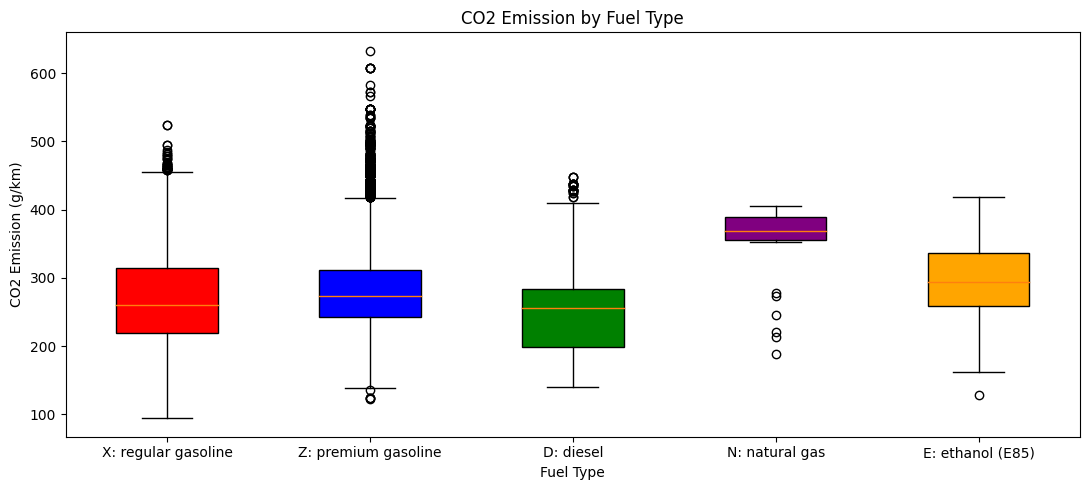

In [24]:
# Identifying names corresponding to fuel types in a dictionary
fuel_type_names = {
    'X': 'regular gasoline',
    'Z': 'premium gasoline',
    'D': 'diesel',
    'E': 'ethanol (E85)',
    'N': 'natural gas'
}

# Colors
colors = ['red', 'blue', 'green', 'purple', 'orange']

# Preparations for plotting the boxplot
plt.figure(figsize=(11,5))

# Drawing the boxplot
boxplot = plt.boxplot([df[df['FuelType'] == fuel]['CO2Emission_g_km'] for fuel in df['FuelType'].unique()],
                      labels=[f"{fuel}: {fuel_type_names[fuel]}" for fuel in df['FuelType'].unique()], patch_artist=True)

# Coloring
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)


plt.title('CO2 Emission by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emission (g/km)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

- To understand the relationship between CO2 emissions and different fuel types, a boxplot was created for the following categories: regular gasoline (X), premium gasoline (Z), diesel (D), natural gas (N), and ethanol E85 (E).

- The first observation is that regular gasoline, premium gasoline, and diesel have nearly identical median CO2 emission values, approximately 260 g/km. This indicates that these fuel types contribute similarly to CO2 emissions on average.

- Natural gas, however, has higher median, Q1, and Q3 values compared to ethanol, indicating that vehicles using natural gas generally emit more CO2 than those using ethanol. This highlights ethanol as a relatively cleaner alternative in terms of CO2 emissions.

- Outliers also play a significant role in this analysis. Ethanol has the fewest outliers, suggesting more consistent CO2 emission levels among vehicles using this fuel. In contrast, premium gasoline exhibits the most outliers, indicating a wider range of CO2 emissions. This variability could be due to differences in vehicle efficiency and engine performance across models using premium gasoline.

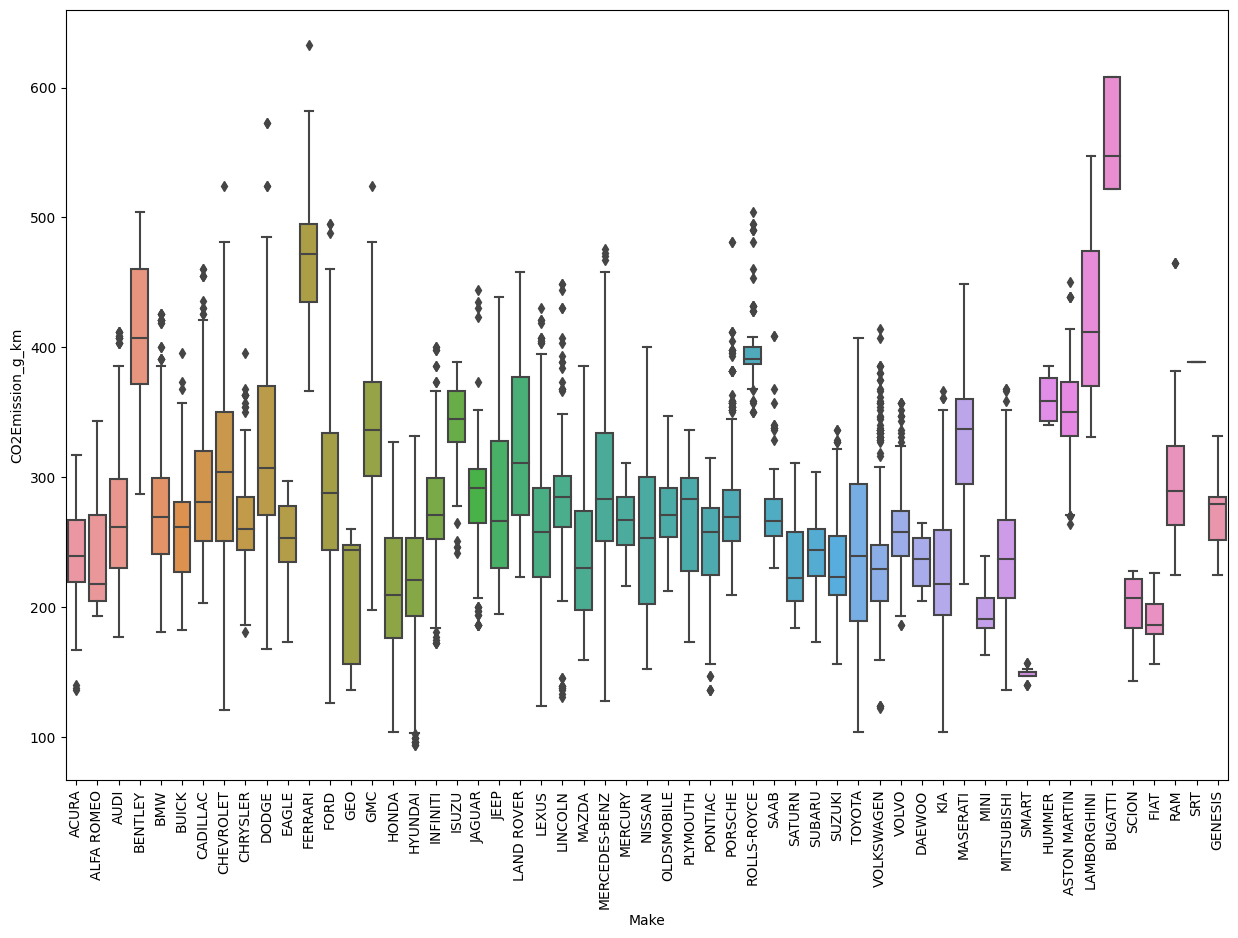

In [25]:
# CO2 Emission by Autos
plt.figure(figsize = (15,10))
sns.boxplot(data = df, x = 'Make', y = 'CO2Emission_g_km')
plt.xticks(rotation=90)
plt.show()

- Naturally, people may wonder which car brands have higher CO2 emissions, as brand appeal can be influenced by factors such as design, power, modernity, or technology. The boxplot analysis reveals that premium car brands like Bugatti, Ferrari, Lamborghini, Maserati, and Bentley have higher CO2 emissions compared to other brands. These brands are often associated with high-performance vehicles, which tend to produce more CO2.

- On the other hand, brands such as Smart, Hyundai, Honda, and Kia are observed to have the lowest CO2 emission values. These brands are often known for producing more fuel-efficient and environmentally friendly vehicles, making them a better choice for those concerned about reducing their carbon footprint.

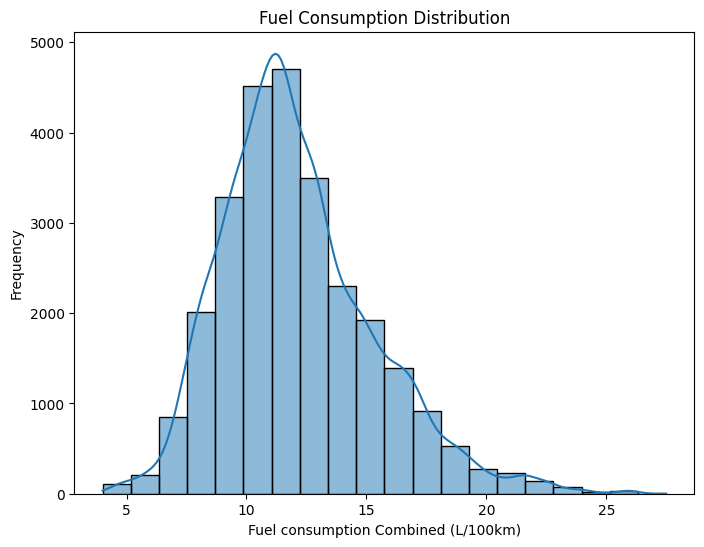

In [26]:
# Fuel consumption histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Comb_L100km', bins=20, kde=True)
plt.xlabel('Fuel consumption Combined (L/100km)')
plt.ylabel('Frequency')
plt.title('Fuel Consumption Distribution')
plt.show()

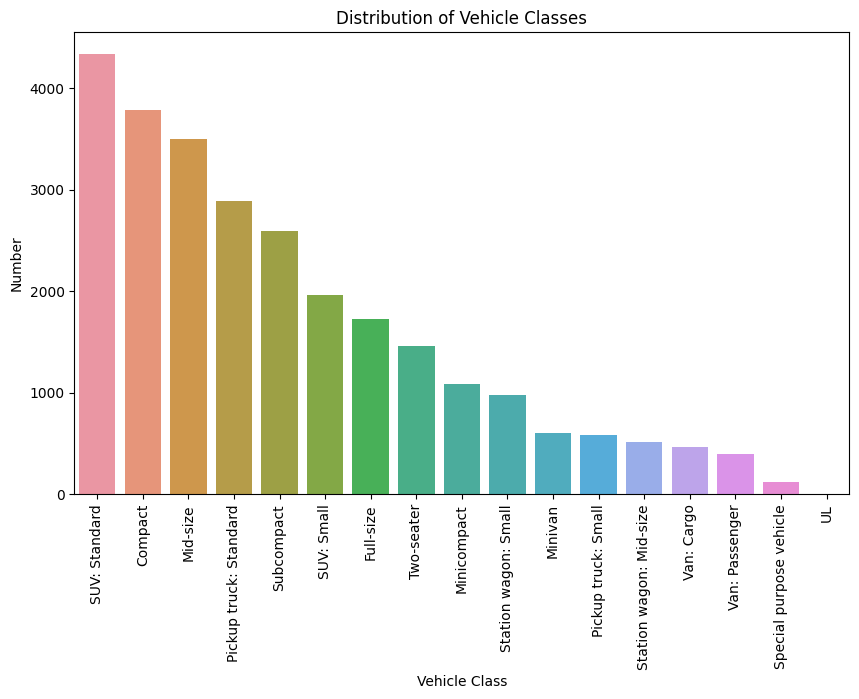

In [27]:
# Categorical data visualization: Distribution of Vehicle Classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VehicleClass', order=df['VehicleClass'].value_counts().index)
plt.xlabel('Vehicle Class')
plt.ylabel('Number')
plt.title('Distribution of Vehicle Classes')
plt.xticks(rotation=90)
plt.show()

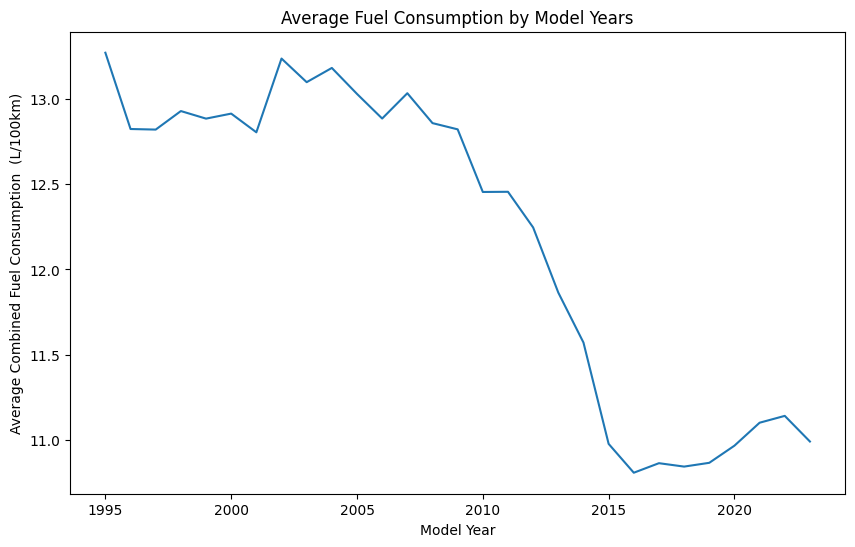

In [28]:
# Line Graph: Average Fuel Consumption by Model Years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='ModelYear', y='Comb_L100km', ci=None)
plt.xlabel('Model Year')
plt.ylabel('Average Combined Fuel Consumption  (L/100km)')
plt.title('Average Fuel Consumption by Model Years')
plt.show()

- The relationship between a vehicle's model year and its carbon emissions offers valuable insights into the environmental impact of different car generations. As technology advances, it is expected that newer cars are designed to be more environmentally conscious.

- Analyzing the data on average fuel consumption by model year supports this hypothesis. For example, cars produced up until 2010 generally had an average combined fuel consumption of about 13 L/100 km, which is relatively high. However, there has been a noticeable decline in fuel consumption for cars produced from 2010 onwards, with values dropping to an average of 11 L/100 km.

- This trend continues, as vehicles from 2015 and 2016 have an average fuel consumption below 11 L/100 km. This indicates that newer models are becoming increasingly fuel-efficient, reflecting advancements in automotive technology aimed at reducing environmental impact.

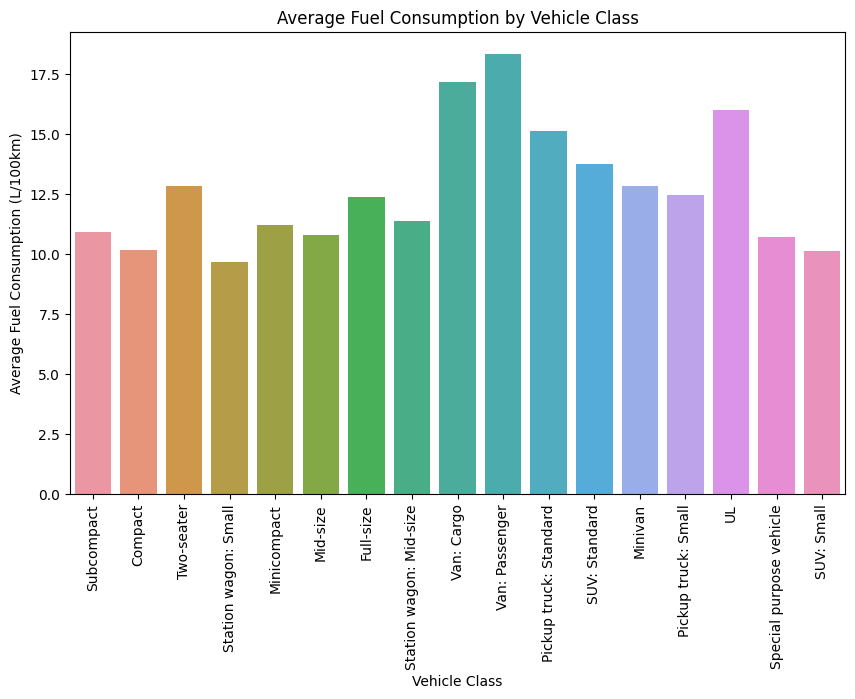

In [29]:
# Numerical Data Visualization with Categorical Data: Average Fuel Consumption by Vehicle Class
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='VehicleClass', y='Comb_L100km', ci=None)
plt.xlabel('Vehicle Class')
plt.ylabel('Average Fuel Consumption (L/100km)')
plt.title('Average Fuel Consumption by Vehicle Class')
plt.xticks(rotation=90)
plt.show()

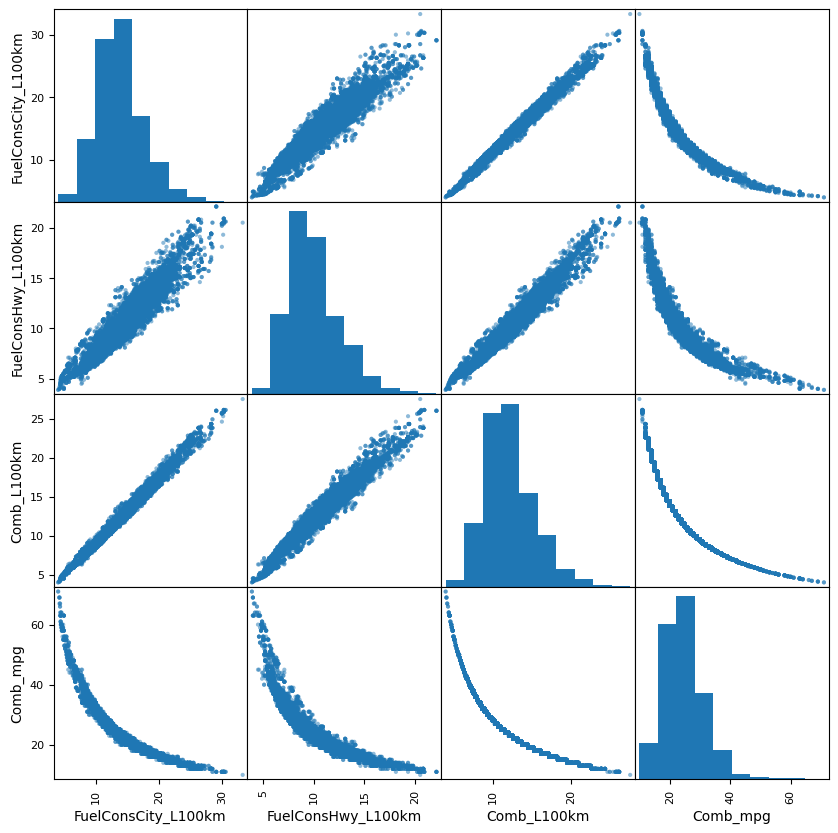

In [30]:
# Scatter Matrix
attributes = ["FuelConsCity_L100km", "FuelConsHwy_L100km", "Comb_L100km", "Comb_mpg"]
scatter_matrix(df[attributes], figsize=(10, 10))
plt.show()

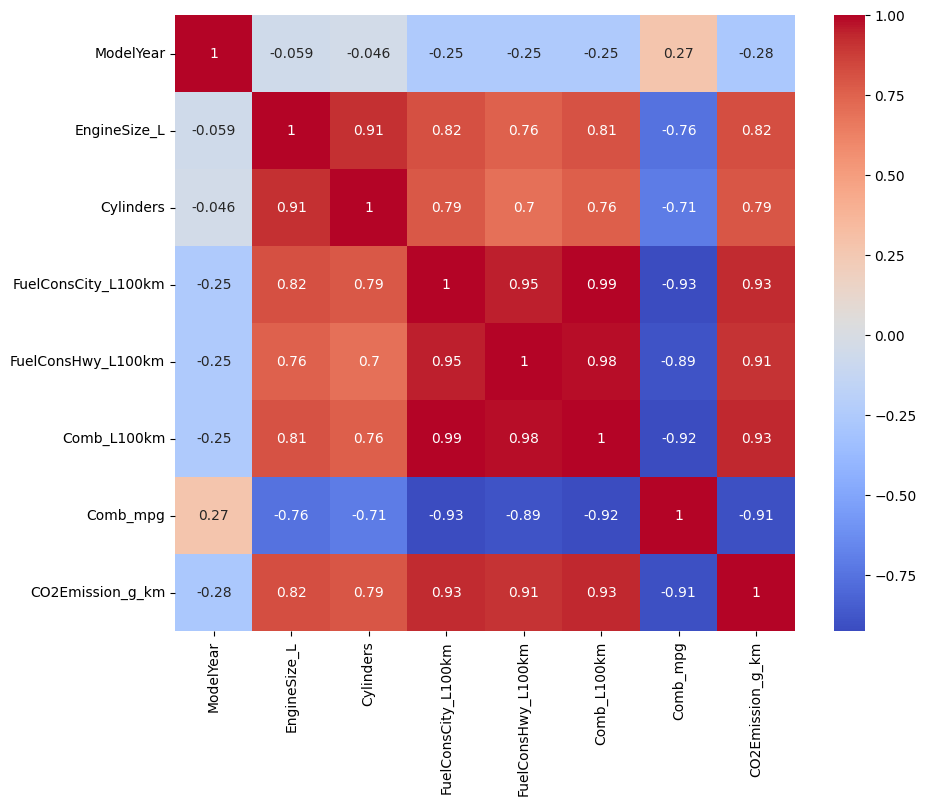

In [31]:
# Correlation matrix and heatmap

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

- It's observed that there is high multicollinearity between 'COMB (L/100 km)', 'FUEL CONSUMPTION CITY (L/100)' and 'FUEL CONSUMPTION HWY (L/100)' attributes. So it's better to only keep column 'COMB (L/100 km)'.

# Feature Engineering
<a id = "8"></a>

- Feature engineering is a critical step in preparing the dataset for machine learning models. It involves transforming raw data into meaningful features that enhance the predictive power of the models. In this study, two different encoding methods were applied to handle categorical variables: Frequency Encoding and One-Hot Encoding.

## - Frequency Encoding
<a id = "9"></a>

- Frequency encoding assigns a label to each category based on its frequency of occurrence in the dataset, rather than creating a separate binary variable for each category. This method was used for the 'Make' and 'Model' columns, which contain car manufacturers and models. Creating a new binary variable for each unique value in these columns would significantly increase the dataset size and processing load. Therefore, frequency encoding was chosen to handle these columns efficiently. This approach helps maintain a manageable dataset size while still encoding the necessary categorical information.

In [32]:
# Frequency Encoding for 'Make'
y_make = df.groupby('Make').size() / len(df)
df['Make_Encoded'] = df['Make'].apply(lambda x_make: y_make[x_make])

In [33]:
y_make

Make
ACURA            0.011481
ALFA ROMEO       0.001852
ASTON MARTIN     0.004185
AUDI             0.034295
BENTLEY          0.006037
BMW              0.061924
BUGATTI          0.000556
BUICK            0.012370
CADILLAC         0.017962
CHEVROLET        0.094367
CHRYSLER         0.018555
DAEWOO           0.001518
DODGE            0.046480
EAGLE            0.001518
FERRARI          0.003259
FIAT             0.003185
FORD             0.081553
GENESIS          0.001889
GEO              0.000704
GMC              0.060516
HONDA            0.024629
HUMMER           0.000778
HYUNDAI          0.023629
INFINITI         0.011370
ISUZU            0.001741
JAGUAR           0.015407
JEEP             0.023666
KIA              0.020555
LAMBORGHINI      0.004333
LAND ROVER       0.008777
LEXUS            0.018814
LINCOLN          0.009148
MASERATI         0.005259
MAZDA            0.028221
MERCEDES-BENZ    0.052368
MERCURY          0.002111
MINI             0.015962
MITSUBISHI       0.012185
NISSAN 

In [34]:
df.drop(['Make'], axis=1, inplace=True)
df.head()

ModelYear         Model VehicleClass  EngineSize_L  Cylinders Transmission  \
0       1995       INTEGRA   Subcompact           1.8          4           A4   
1       1995       INTEGRA   Subcompact           1.8          4           M5   
2       1995  INTEGRA GS-R   Subcompact           1.8          4           M5   
3       1995        LEGEND      Compact           3.2          6           A4   
4       1995  LEGEND COUPE      Compact           3.2          6           A4   

  FuelType  FuelConsCity_L100km  FuelConsHwy_L100km  Comb_L100km  Comb_mpg  \
0        X                 11.6                 8.3         10.1        28   
1        X                 11.0                 8.3          9.8        29   
2        Z                 10.8                 8.3          9.7        29   
3        Z                 14.2                10.5         12.5        23   
4        Z                 14.6                11.0         13.0        22   

   CO2Emission_g_km  Make_Encoded  
0               232      0.011481  
1               225      0.011481  
2               223      0.011481  
3               288      0.011481  
4               299      0.011481

In [35]:
# Frequency Encoding for 'Model'
y_model = df.groupby('Model').size() / len(df)
df['Model_Encoded'] = df['Model'].apply(lambda x_model: y_model[x_model])

In [36]:
y_model

Model
1 SERIES M COUPE    0.000037
1.6 EL              0.000074
1.6EL               0.000222
1.7EL               0.000370
124 SPIDER          0.000074
                      ...   
iM                  0.000074
iQ                  0.000148
tC                  0.000444
xB                  0.000370
xD                  0.000296
Length: 4815, dtype: float64

In [37]:
df.drop(['Model'], axis=1, inplace=True)
df.head()

ModelYear VehicleClass  EngineSize_L  Cylinders Transmission FuelType  \
0       1995   Subcompact           1.8          4           A4        X   
1       1995   Subcompact           1.8          4           M5        X   
2       1995   Subcompact           1.8          4           M5        Z   
3       1995      Compact           3.2          6           A4        Z   
4       1995      Compact           3.2          6           A4        Z   

   FuelConsCity_L100km  FuelConsHwy_L100km  Comb_L100km  Comb_mpg  \
0                 11.6                 8.3         10.1        28   
1                 11.0                 8.3          9.8        29   
2                 10.8                 8.3          9.7        29   
3                 14.2                10.5         12.5        23   
4                 14.6                11.0         13.0        22   

   CO2Emission_g_km  Make_Encoded  Model_Encoded  
0               232      0.011481       0.000518  
1               225      0.011481       0.000518  
2               223      0.011481       0.000185  
3               288      0.011481       0.000037  
4               299      0.011481       0.000074

## - One-Hot Encoding
<a id = "10"></a>

- One-Hot Encoding was applied to the 'Vehicle Class', 'Fuel Type', and 'Transmission' columns. This method converts each category into a new binary column, where a value of 1 indicates the presence of the category and 0 indicates its absence. Although this increases the number of columns in the dataset, it is effective for categorical variables with a limited number of unique values. One-Hot Encoding ensures that the machine learning algorithms can interpret these categorical variables without assuming any ordinal relationship between the categories.

In [38]:
# Creating OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# One-hot encoding and converting the result into a data frame
encoded_data = encoder.fit_transform(df[['FuelType', 'VehicleClass', 'Transmission']])

# Adding one-hot encoded columns to the data frame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['FuelType', 'VehicleClass', 'Transmission']))

# Delete one-hot encoded columns from the data frame
df.drop(['FuelType', 'VehicleClass', 'Transmission'], axis=1, inplace=True)

# Consolidating results
df = pd.concat([df, encoded_df], axis=1)

In [39]:
df.head()

ModelYear  EngineSize_L  Cylinders  FuelConsCity_L100km  \
0       1995           1.8          4                 11.6   
1       1995           1.8          4                 11.0   
2       1995           1.8          4                 10.8   
3       1995           3.2          6                 14.2   
4       1995           3.2          6                 14.6   

   FuelConsHwy_L100km  Comb_L100km  Comb_mpg  CO2Emission_g_km  Make_Encoded  \
0                 8.3         10.1        28               232      0.011481   
1                 8.3          9.8        29               225      0.011481   
2                 8.3          9.7        29               223      0.011481   
3                10.5         12.5        23               288      0.011481   
4                11.0         13.0        22               299      0.011481   

   Model_Encoded  FuelType_D  FuelType_E  FuelType_N  FuelType_X  FuelType_Z  \
0       0.000518         0.0         0.0         0.0         1.0         0.0   
1       0.000518         0.0         0.0         0.0         1.0         0.0   
2       0.000185         0.0         0.0         0.0         0.0         1.0   
3       0.000037         0.0         0.0         0.0         0.0         1.0   
4       0.000074         0.0         0.0         0.0         0.0         1.0   

   VehicleClass_Compact  VehicleClass_Full-size  VehicleClass_Mid-size  \
0                   0.0                     0.0                    0.0   
1                   0.0                     0.0                    0.0   
2                   0.0                     0.0                    0.0   
3                   1.0                     0.0                    0.0   
4                   1.0                     0.0                    0.0   

   VehicleClass_Minicompact  VehicleClass_Minivan  \
0                       0.0                   0.0   
1                       0.0                   0.0   
2                       0.0                   0.0   
3                       0.0                   0.0   
4                       0.0                   0.0   

   VehicleClass_Pickup truck: Small  VehicleClass_Pickup truck: Standard  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   VehicleClass_SUV: Small  VehicleClass_SUV: Standard  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   

   VehicleClass_Special purpose vehicle  VehicleClass_Station wagon: Mid-size  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   VehicleClass_Station wagon: Small  VehicleClass_Subcompact  \
0                                0.0                      1.0   
1                                0.0                      1.0   
2                                0.0                      1.0   
3                                0.0                      0.0   
4                                0.0                      0.0   

   VehicleClass_Two-seater  VehicleClass_UL  VehicleClass_Van: Cargo  \
0                      0.0              0.0                      0.0   
1                      0.0              0.0                      0.0   
2   

### Columns To Drop

- FuelConsCity_L100km and FuelConsHwy_L100km: These columns exhibited high multicollinearity with other features. High multicollinearity can distort the results of regression models, leading to unreliable and unstable estimates of regression coefficients. Therefore, these columns were removed to ensure the robustness of the model.

- Comb_mpg: This column was identified as a duplicate of the combined fuel consumption data already present in another format. Retaining duplicate columns can lead to redundant information, increasing the computational load without adding value. Hence, it was dropped from the dataset.

In [40]:
df.drop(['FuelConsCity_L100km', 'FuelConsHwy_L100km', 'Comb_mpg',], axis=1, inplace=True)
df.head()

ModelYear  EngineSize_L  Cylinders  Comb_L100km  CO2Emission_g_km  \
0       1995           1.8          4         10.1               232   
1       1995           1.8          4          9.8               225   
2       1995           1.8          4          9.7               223   
3       1995           3.2          6         12.5               288   
4       1995           3.2          6         13.0               299   

   Make_Encoded  Model_Encoded  FuelType_D  FuelType_E  FuelType_N  \
0      0.011481       0.000518         0.0         0.0         0.0   
1      0.011481       0.000518         0.0         0.0         0.0   
2      0.011481       0.000185         0.0         0.0         0.0   
3      0.011481       0.000037         0.0         0.0         0.0   
4      0.011481       0.000074         0.0         0.0         0.0   

   FuelType_X  FuelType_Z  VehicleClass_Compact  VehicleClass_Full-size  \
0         1.0         0.0                   0.0                     0.0   
1         1.0         0.0                   0.0                     0.0   
2         0.0         1.0                   0.0                     0.0   
3         0.0         1.0                   1.0                     0.0   
4         0.0         1.0                   1.0                     0.0   

   VehicleClass_Mid-size  VehicleClass_Minicompact  VehicleClass_Minivan  \
0                    0.0                       0.0                   0.0   
1                    0.0                       0.0                   0.0   
2                    0.0                       0.0                   0.0   
3                    0.0                       0.0                   0.0   
4                    0.0                       0.0                   0.0   

   VehicleClass_Pickup truck: Small  VehicleClass_Pickup truck: Standard  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   VehicleClass_SUV: Small  VehicleClass_SUV: Standard  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   

   VehicleClass_Special purpose vehicle  VehicleClass_Station wagon: Mid-size  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   VehicleClass_Station wagon: Small  VehicleClass_Subcompact  \
0                                0.0                      1.0   
1                                0.0                      1.0   
2                                0.0                      1.0   
3                                0.0                      0.0   
4                                0.0                      0.0   

   VehicleClass_Two-seater  VehicleClass_UL  VehicleClass_Van: Cargo  \
0                      0.0              0.0                      0.0   
1                      0.0              0.0                      0.0   
2                      0.0              0.0                      0.0   
3                      0.0              0.0                      0.0   
4                      0.0              0.0                      0.0   

   VehicleClass_Van: Passenger  Transmission_A10  Transmission_A3  \
0                          0.0               0.0       

# Random Forest (Regression)
<a id = "11"></a>

- Random Forest is a collection of decision trees. It is safely meant to imply that a Random Forest is made up of several trees that are built in a "random" manner.  Each tree is built from a separate set of rows, and a different set of features is chosen for splitting at each node.  Each of the trees provides a unique prediction. The predictions are then averaged to yield a single outcome. 

## - Independent Variables (features) - Target Value
<a id = "12"></a>

In [41]:
# Selecting independent variables (features) and the target variable
X = df.drop(columns=["CO2Emission_g_km"])  # Independent variables
y = df["CO2Emission_g_km"]  # Target variable

# Splitting the data into training and testing sets
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(X, y, test_size=0.3, random_state=42)

## - Model and Predictions
<a id = "13"></a>

In [42]:
# Creating a Random Forest Regressor model
model_RF = RandomForestRegressor(random_state=42)

# Training the model
model_RF.fit(X_train_RF, y_train_RF)

# Making predictions on the test dataset
y_pred_RF = model_RF.predict(X_test_RF)

## - Performance
<a id = "14"></a>

In [43]:
# Measure the model's performance
mse = mean_squared_error(y_test_RF, y_pred_RF)
r2 = r2_score(y_test_RF, y_pred_RF)
mae = mean_absolute_error(y_test_RF, y_pred_RF)
evs = explained_variance_score(y_test_RF, y_pred_RF)
max_err = max_error(y_test_RF, y_pred_RF)

# Print the performance metrics with bold formatting using Markdown
display(Markdown(f"**Mean Squared Error (MSE):** {mse:.4f}"))
display(Markdown(f"**R-Squared (R2 Score):** {r2:.4f}"))
display(Markdown(f"**Mean Absolute Error (MAE):** {mae:.4f}"))
display(Markdown(f"**Explained Variance Score (EVS):** {evs:.4f}"))
display(Markdown(f"**Max Error:** {max_err:.4f}"))


**Mean Squared Error (MSE):** 5.0177

**R-Squared (R2 Score):** 0.9989

**Mean Absolute Error (MAE):** 0.3777

**Explained Variance Score (EVS):** 0.9989

**Max Error:** 84.6100

- The MSE value of 5.0177 indicates a relatively low level of prediction error. The lower the MSE, the closer the predicted values align with the actual values, demonstrating the model's proficiency in minimizing prediction discrepancies. The R-Squared (R2) score quantifies the proportion of the variance in the dependent variable (carbon emissions) that is captured by the model. A score of 0.9989 is exceptionally high, implying that the Random Forest model accounts for approximately 99.89% of the variability in carbon emissions based on the selected features. With an MAE of 0.3777, the model exhibits a high degree of accuracy, as it, on average, deviates by only 0.3777 units from the actual carbon emission values. This low MAE suggests that the Random Forest model is adept at making precise predictions. An EVS of 0.9989 reaffirms the model's exceptional explanatory power, aligning closely with the actual values and providing a robust understanding of the factors influencing carbon emissions. While the model generally performs well with a low MAE, the Max Error of 84.6100 indicates that there are instances where the model exhibits larger errors. Investigating these specific instances can offer insights into scenarios where the model may be less accurate.

## - Top 20 Errors
<a id = "15"></a>

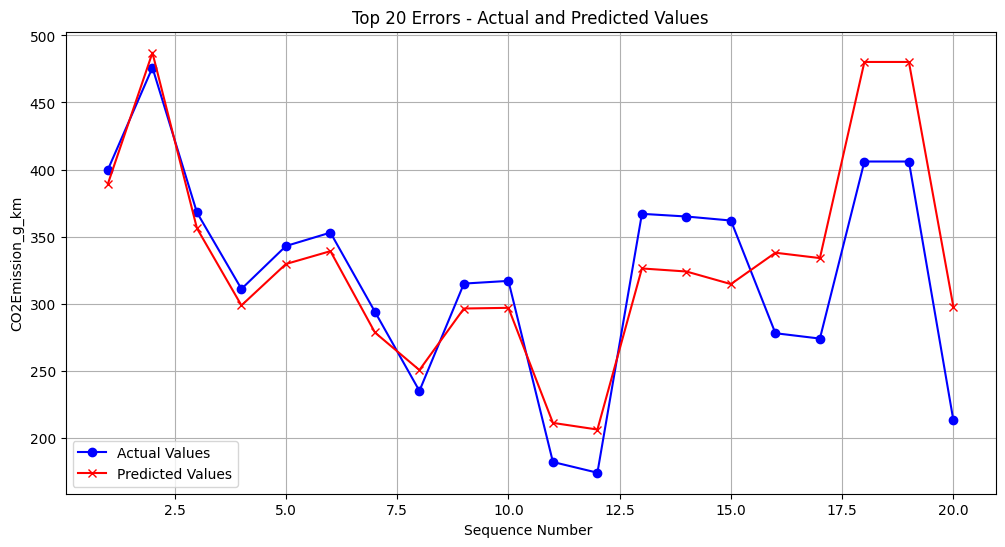

In [44]:
# Calculate the absolute errors
errors = np.abs(y_test_RF - y_pred_RF)

# Find the indices of the top 20 largest errors
top_20_indices = np.argsort(errors)[-20:]

# Get the true values and predicted values corresponding to the top 20 largest errors
top_20_true_values = y_test_RF.iloc[top_20_indices]
top_20_predicted_values = y_pred_RF[top_20_indices]

# Plot both true and predicted values for the top 20 largest errors
plt.figure(figsize=(12, 6))
plt.plot(range(1, 21), top_20_true_values, marker='o', label='Actual Values', color='b')
plt.plot(range(1, 21), top_20_predicted_values, marker='x', label='Predicted Values', color='r')
plt.title("Top 20 Errors - Actual and Predicted Values")
plt.xlabel("Sequence Number ")
plt.ylabel("CO2Emission_g_km")
plt.legend()
plt.grid(True)
plt.show()

- Visualizing allows evaluating the performance of the model in a more understandable way. For these reasons, the graph showing the Top 20 errors allows for quickly determining in which regions the model performs better or worse. By determining where the model's biggest errors occur, the chart helps detect possible data anomalies at these points or special situations where the model is challenged. This allows for the identification of the model's limitations and improvement potential.

- As can be seen from the graph, the minimum value of the last 10 major errors is approximately 10 g/km. This maximum value gradually increased until it reached 84.61, meaning that the maximum value of the error is equal to the value found before.


# Random Forest - LIME
<a id = "16"></a>

- LIME (Local Interpretable Model-agnostic Explanations) was employed to provide local explanations for individual predictions made by the Random Forest model. This approach helps identify the key features influencing specific predictions, offering valuable insights into the model's decision-making process.

In [45]:
feature_names = X_train_RF.columns.tolist()

In [46]:
# Initialize the LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(training_data=X_train_RF.values, feature_names=feature_names, class_names=['CO2Emission_g_km'], mode='regression')

# Generate explanation for a single instance
explanation = explainer.explain_instance(X_test_RF.iloc[0].values, model_RF.predict, num_features=len(X.columns))

# Display the explanation using show_in_notebook
explanation.show_in_notebook(show_table=True)

# Alternatively, use matplotlib to display the plot
# fig = explanation.as_pyplot_figure()
plt.show()

In [47]:
# Selecting the top 10 features to use in the description
top_10_features = explanation.as_list()[:10]

# Printing selected properties
for feature, value in top_10_features:
    print(f"Feature: {feature}, Value: {value}")

Feature: FuelType_E <= 0.00, Value: 62.23443676891931
Feature: FuelType_D <= 0.00, Value: -46.15050822743757
Feature: 9.90 < Comb_L100km <= 11.60, Value: -39.817141880003774
Feature: Transmission_M4 <= 0.00, Value: 37.747817111084665
Feature: Transmission_AV10 <= 0.00, Value: -31.295958377539012
Feature: Transmission_AS10 <= 0.00, Value: -20.34407619630263
Feature: Transmission_AM6 <= 0.00, Value: 20.002410380314647
Feature: VehicleClass_Special purpose vehicle <= 0.00, Value: 16.29112941206243
Feature: Transmission_AV7 <= 0.00, Value: 15.53076482764535
Feature: FuelType_N <= 0.00, Value: 15.3866463268946


- The LIME (Local Interpretable Model-agnostic Explanations) visualization for a Random Forest prediction shows how different features contribute to the predicted CO2 emission value of 235.00 g/km.


- **Positive Contributions**:
    - FuelType_E (Ethanol): The most significant positive contributor, with a weight of 65.03. This indicates that using Ethanol as fuel increases the predicted CO2 emission.
    - Transmission_AM5: Contributes positively with a weight of 45.27, suggesting that this transmission type is associated with higher CO2 emissions.
    - Transmission_AV10: Adds 24.07 to the predicted value, indicating its role in increasing emissions.
    
    
- **Negative Contributions**:
    - FuelType_N (Natural Gas): The most significant negative contributor, with a weight of -41.77. This suggests that using Natural Gas as fuel significantly reduces CO2 emissions.
    - Comb_L100km (Combined Fuel Consumption between 9.90 and 11.60 L/100 km): Contributes -40.86, indicating that vehicles with this range of fuel consumption have lower CO2 emissions.
    - FuelType_D (Diesel): Adds -27.68, showing its role in reducing emissions.

# Random Forest - SHAP
<a id = "17"></a>

- SHAP (SHapley Additive exPlanations) values were used to provide global and local explanations for the predictions made by the Random Forest model. SHAP leverages game theory to explain the output of machine learning models, attributing the prediction to individual feature contributions.

In [48]:
# Calculate SHAP values
explainer_SHAP = shap.TreeExplainer(model_RF)
shap_values = explainer_SHAP.shap_values(X_test_RF)

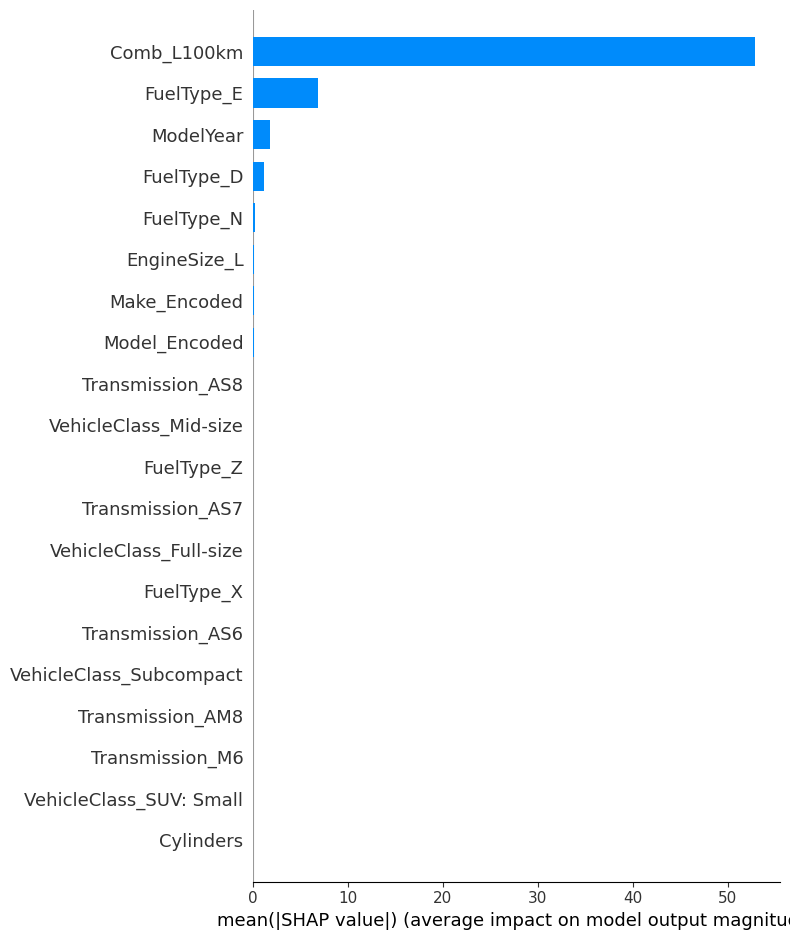

In [49]:
# Visualize SHAP values for a feature or prediction
shap.summary_plot(shap_values, X, plot_type='bar')  # Feature importance ranking

- The SHAP summary plot provides a global interpretation by displaying the average effect size of each feature on the model output across all samples. When examining the average effect sizes, the largest impact is seen from the combined fuel consumption, which has a weight of approximately 55 units. This indicates that combined fuel consumption significantly influences the predicted CO2 emission values. Other important features include the Ethanol fuel type and the model year of the vehicle.

- Unlike LIME, which provides a local explanation for a specific prediction, the SHAP summary plot helps identify the most influential features across the entire dataset. However, it does not indicate whether the impact of these features is positive or negative.

In [50]:
# Visualize the SHAP values of a given forecast (e.g., 0th forecast)
shap.initjs()
shap.force_plot(explainer_SHAP.expected_value[0], shap_values[0], X.iloc[0, :])

- To understand whether a feature's impact is positive or negative for a specific prediction, a SHAP force plot is used. The force plot visualizes the SHAP values for a single prediction, showing how each feature contributes to pushing the prediction higher or lower compared to the baseline value.

- For example, in the force plot for a specific prediction with a CO2 emission value of 235.00 g/km, the following insights can be drawn:

    - Positive SHAP values push the prediction higher.
    - Negative SHAP values lower the prediction.
    - Combined fuel consumption has the largest negative impact, indicating that lower fuel consumption reduces the predicted CO2 emission.
    - The fuel type being Ethanol has a positive impact, increasing the predicted CO2 emission value.
    - Model year also contributes to the prediction, with newer model years typically associated with lower emissions.

# Random Forest - ALIBI
<a id = "18"></a>

- ALIBI is another explainable AI framework that provides comprehensive and interpretable insights into model predictions. For the Random Forest model, ALIBI was used to enhance model transparency and interpretability, providing detailed explanations of how specific features contribute to the prediction of CO2 emissions.

**ALIBI Explanation**

- ALIBI's integration with Tree SHAP values allows for a detailed breakdown of feature contributions, similar to SHAP but with additional capabilities for handling different model types and explanations. In this case, ALIBI was used to analyze the Random Forest model's predictions on CO2 emissions.

In [51]:
# Creating the Alibi TreeShap annotator
explainer = TreeShap(model_RF, model_output='regression')
explainer.fit(X_train_RF)

# https://docs.seldon.io/projects/alibi/en/latest/overview/high_level.html

TreeShap(meta={
  'name': 'TreeShap',
  'type': ['whitebox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'model_output': 'raw',
              'summarise_background': False,
              'summarise_result': None,
              'approximate': None,
              'interactions': None,
              'explain_loss': None,
              'algorithm': 'interventional',
              'kwargs': {}}
            ,
  'version': '0.9.6'}
)

In [52]:
sample_idx = 0  # Index of the sample from which we want to get the description
sample = X_test_RF.iloc[[sample_idx]]  # Import the selected instance
sample

ModelYear  EngineSize_L  Cylinders  Comb_L100km  Make_Encoded  \
5312       2002           2.0          4         10.2      0.028221   

      Model_Encoded  FuelType_D  FuelType_E  FuelType_N  FuelType_X  \
5312       0.000185         0.0         0.0         0.0         1.0   

      FuelType_Z  VehicleClass_Compact  VehicleClass_Full-size  \
5312         0.0                   1.0                     0.0   

      VehicleClass_Mid-size  VehicleClass_Minicompact  VehicleClass_Minivan  \
5312                    0.0                       0.0                   0.0   

      VehicleClass_Pickup truck: Small  VehicleClass_Pickup truck: Standard  \
5312                               0.0                                  0.0   

      VehicleClass_SUV: Small  VehicleClass_SUV: Standard  \
5312                      0.0                         0.0   

      VehicleClass_Special purpose vehicle  \
5312                                   0.0   

      VehicleClass_Station wagon: Mid-size  VehicleClass_Station wagon: Small  \
5312                                   0.0                                0.0   

      VehicleClass_Subcompact  VehicleClass_Two-seater  VehicleClass_UL  \
5312                      0.0                      0.0              0.0   

      VehicleClass_Van: Cargo  VehicleClass_Van: Passenger  Transmission_A10  \
5312                      0.0                          0.0               0.0   

      Transmission_A3  Transmission_A4  Transmission_A5  Transmission_A6  \
5312              0.0              1.0              0.0              0.0   

      Transmission_A7  Transmission_A8  Transmission_A9  Transmission_AM5  \
5312              0.0              0.0              0.0               0.0   

      Transmission_AM6  Transmission_AM7  Transmission_AM8  Transmission_AM9  \
5312               0.0               0.0               0.0               0.0   

      Transmission_AS10  Transmission_AS4  Transmission_AS5  Transmission_AS6  \
5312                0.0               0.0               0.0               0.0   

      Transmission_AS7  Transmission_AS8  Transmission_AS9  Transmission_AV  \
5312               0.0               0.0               0.0              0.0   

      Transmission_AV1  Transmission_AV10  Transmission_AV6  Transmission_AV7  \
5312               0.0                0.0               0.0               0.0   

      Transmission_AV8  Transmission_M4  Transmission_M5  Transmission_M6  \
5312               0.0              0.0              0.0              0.0   

      Transmission_M7  
5312              0.0

In [53]:
explanation = explainer.explain(sample)

In [54]:
# Getting SHAP values
shap_values = explanation.shap_values

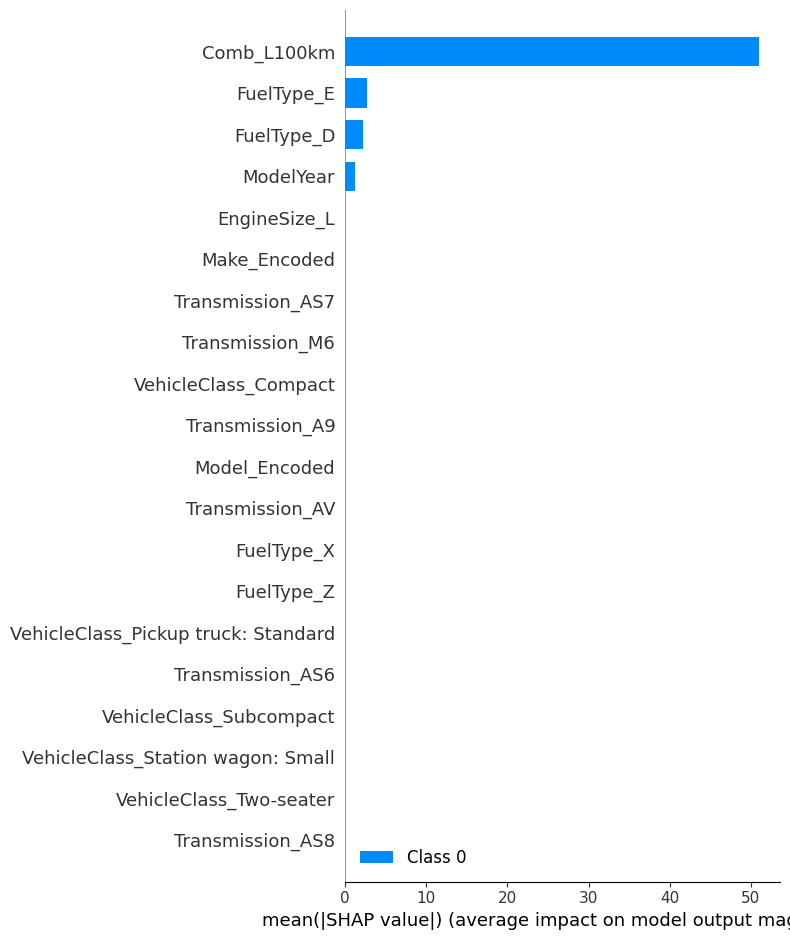

In [55]:
# Visualizing SHAP values
shap.summary_plot(shap_values, X_test_RF, feature_names=X_test_RF.columns)

- The SHAP summary plot generated using ALIBI's TreeShap explainer illustrates the average impact of each feature on the Random Forest model's predictions for CO2 emissions. The most influential feature is combined fuel consumption (Comb_L100km), which has a significantly higher mean SHAP value compared to other features. This dominance is logical because fuel consumption directly correlates with CO2 emissions; higher fuel consumption generally results in more fuel being burned, leading to higher emissions. Ethanol (FuelType_E) and Diesel (FuelType_D) also show noticeable impacts. Ethanol's influence can vary based on its blend and engine compatibility, while Diesel engines typically produce lower CO2 emissions per kilometer compared to gasoline engines.

- The model year of the vehicle and the specific type of transmission (Transmission_AS8) have relatively minimal impacts on the predictions. Newer model years tend to be more efficient due to advancements in technology and stricter emission regulations, while transmission types affect fuel efficiency and driving dynamics to a lesser extent. Overall, the ALIBI explanation emphasizes the critical role of fuel consumption in determining CO2 emissions, with fuel types and vehicle specifications also playing significant roles. This analysis provides valuable insights for developing strategies to reduce vehicle emissions, focusing on improving fuel efficiency and exploring alternative fuel options.

# Gradient Boosting
<a id = "19"></a>

- Gradient Boosting is a machine-learning approach that is commonly employed in regression and classification tasks. It returns a prediction model in the form of an ensemble of weak prediction models, most commonly simple decision trees. When a decision tree is used as the weak learner, the resulting algorithm is known as gradient-boosted trees, and it typically exceeds random forest.

In [56]:
# Read the Excel file into a DataFrame
# df = pd.read_excel('df.xlsx')
df.head()

ModelYear  EngineSize_L  Cylinders  Comb_L100km  CO2Emission_g_km  \
0       1995           1.8          4         10.1               232   
1       1995           1.8          4          9.8               225   
2       1995           1.8          4          9.7               223   
3       1995           3.2          6         12.5               288   
4       1995           3.2          6         13.0               299   

   Make_Encoded  Model_Encoded  FuelType_D  FuelType_E  FuelType_N  \
0      0.011481       0.000518         0.0         0.0         0.0   
1      0.011481       0.000518         0.0         0.0         0.0   
2      0.011481       0.000185         0.0         0.0         0.0   
3      0.011481       0.000037         0.0         0.0         0.0   
4      0.011481       0.000074         0.0         0.0         0.0   

   FuelType_X  FuelType_Z  VehicleClass_Compact  VehicleClass_Full-size  \
0         1.0         0.0                   0.0                     0.0   
1         1.0         0.0                   0.0                     0.0   
2         0.0         1.0                   0.0                     0.0   
3         0.0         1.0                   1.0                     0.0   
4         0.0         1.0                   1.0                     0.0   

   VehicleClass_Mid-size  VehicleClass_Minicompact  VehicleClass_Minivan  \
0                    0.0                       0.0                   0.0   
1                    0.0                       0.0                   0.0   
2                    0.0                       0.0                   0.0   
3                    0.0                       0.0                   0.0   
4                    0.0                       0.0                   0.0   

   VehicleClass_Pickup truck: Small  VehicleClass_Pickup truck: Standard  \
0                               0.0                                  0.0   
1                               0.0                                  0.0   
2                               0.0                                  0.0   
3                               0.0                                  0.0   
4                               0.0                                  0.0   

   VehicleClass_SUV: Small  VehicleClass_SUV: Standard  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   

   VehicleClass_Special purpose vehicle  VehicleClass_Station wagon: Mid-size  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   

   VehicleClass_Station wagon: Small  VehicleClass_Subcompact  \
0                                0.0                      1.0   
1                                0.0                      1.0   
2                                0.0                      1.0   
3                                0.0                      0.0   
4                                0.0                      0.0   

   VehicleClass_Two-seater  VehicleClass_UL  VehicleClass_Van: Cargo  \
0                      0.0              0.0                      0.0   
1                      0.0              0.0                      0.0   
2                      0.0              0.0                      0.0   
3                      0.0              0.0                      0.0   
4                      0.0              0.0                      0.0   

   VehicleClass_Van: Passenger  Transmission_A10  Transmission_A3  \
0                          0.0               0.0       

In [57]:
# Selecting independent variables and dependent variable
X = df.drop(columns=['CO2Emission_g_km'])  
y = df['CO2Emission_g_km'] 

In [58]:
# Dividing the dataset into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Defining the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Training the model
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [60]:
# Evaluating model performance:

# Making predictions on the training set
train_predictions = model.predict(X_train)

# Making predictions on the test set
test_predictions = model.predict(X_test)

# Calculate the R-squared value
r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

# Calculate the Mean Square Error (MSE) value
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

print(f'Training R-Square Value: {r2_train}')
print(f'Test R-Square Value: {r2_test}')
print(f'Training MSE Value: {mse_train}')
print(f'Test MSE Value: {mse_test}')

Training R-Square Value: 0.9989967052343008
Test R-Square Value: 0.9987927829150172
Training MSE Value: 4.359087438237971
Test MSE Value: 5.217023538640374


- The training R-square value of 0.9989 indicates an exceptionally high level of variance in the dependent variable (carbon emissions) explained by the Gradient Boosting model. This signifies that approximately 99.89% of the variability in the training dataset is captured by the model, showcasing its strong ability to account for the observed variations. Similarly, the test R-square value of 0.9987 reflects the model's robust generalization performance. This high R-square on the test dataset suggests that the model extends its predictive capacity effectively to unseen data, indicating a consistent and reliable explanatory power beyond the training set.

- The training MSE value of 4.3591 represents the average squared difference between the predicted and actual values in the training dataset. This relatively low MSE indicates that, on average, the model's predictions deviate by a minimal squared distance from the actual carbon emission values during the training phase. The test MSE value of 5.217 signifies the average squared difference between the predicted and actual values on the test dataset. Although slightly higher than the training MSE, this value still suggests a commendable level of predictive accuracy. Overall, these metrics highlight the Gradient Boosting model's ability to generalize well to new, unseen data while maintaining a high degree of accuracy.

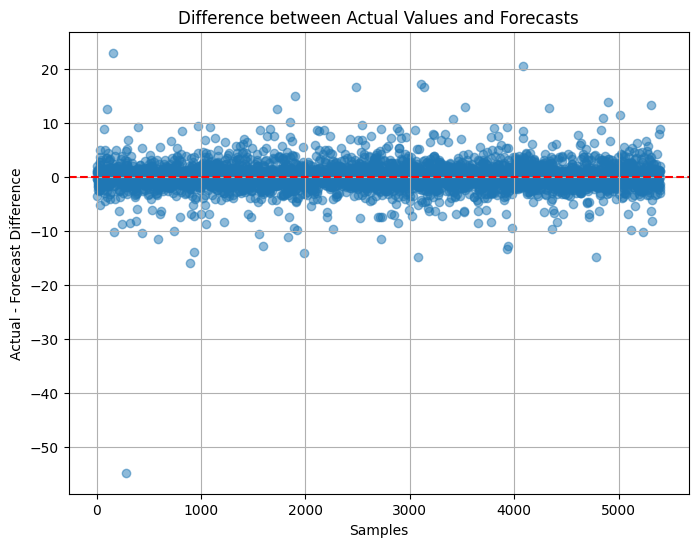

In [61]:
# Graph showing the difference between actual values and forecasts
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y_test)), y_test - test_predictions, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Actual - Forecast Difference')
plt.title('Difference between Actual Values and Forecasts')
plt.grid(True)
plt.show()

- It was thought that it would be important to visualize the model performance other than metrics, allowing us to better understand the results and visually retaining the performance of the model in the minds of decision makers.

- When the figure is examined, the differences between the actual data and the corresponding predictions are represented on a graph. In the graph, point 0 is also represented by a red line, the purpose of which is to easily observe how far/close the differences are to point 0.

- Errors are generally spread around the 0 point, which can be easily observed. However, a few outliers stand out. Two big outliers should be taken into consideration, above +20 and below -50. There are more than 5000 samples in the graph, which constitutes almost 25% of our total training data.


# Gradient Boosting - SHAP
<a id = "20"></a>

- SHAP (SHapley Additive exPlanations) values were used to provide both global and local explanations for the predictions made by the Gradient Boosting model. SHAP values help in understanding the contribution of each feature to the prediction, offering a transparent view of the model's decision-making process.

In [62]:
# Installing the SHAP library and setting up dependencies
shap.initjs()

# Separating independent variables and dependent variable
X = df.drop(columns=['CO2Emission_g_km'])
y = df['CO2Emission_g_km']

# Defining and training the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X, y)

GradientBoostingRegressor(random_state=42)

In [63]:
# Using TreeExplainer to calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

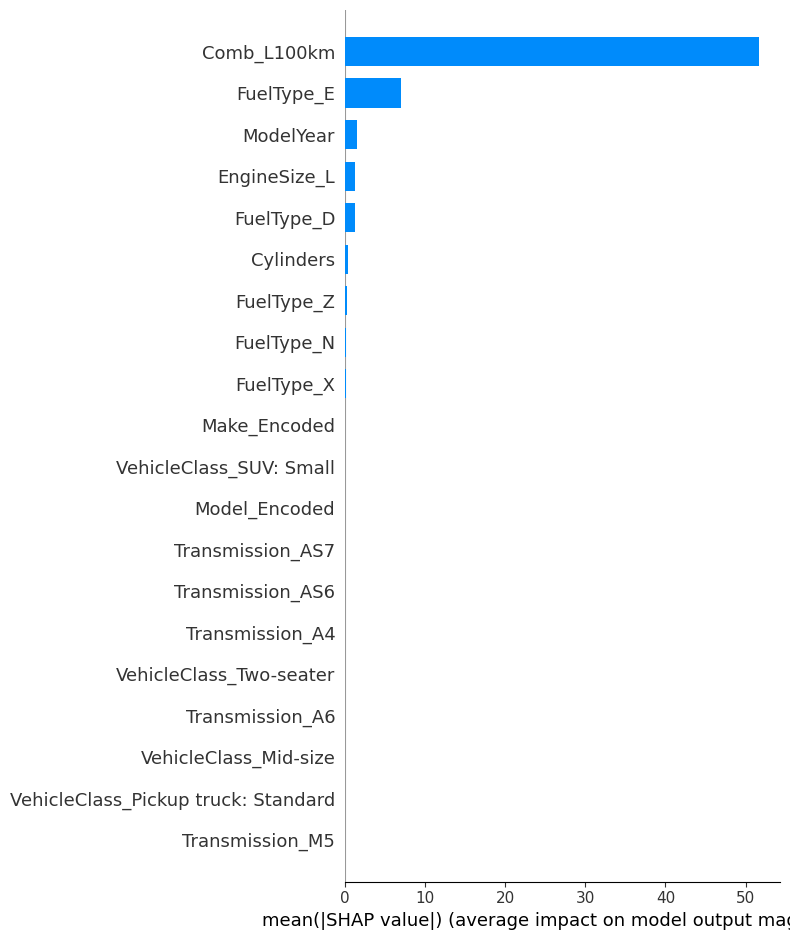

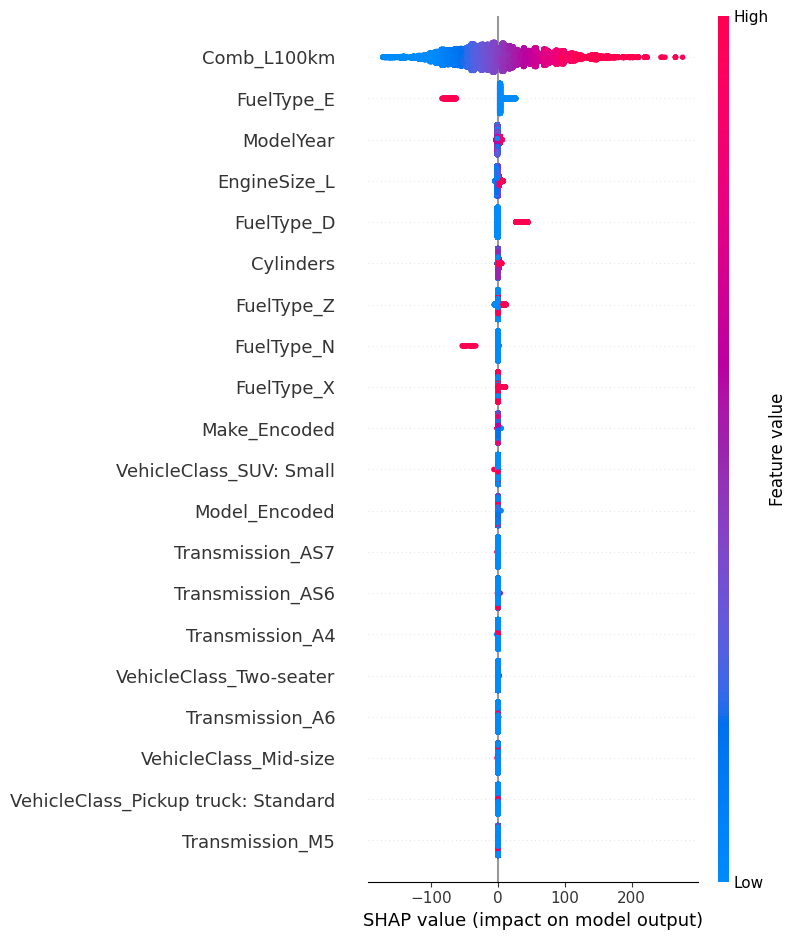

In [64]:
# Visualize SHAP values for a feature or prediction
shap.summary_plot(shap_values, X, plot_type='bar')  # Feature importance ranking
shap.summary_plot(shap_values, X)  # Distribution of SHAP values for all features

In [65]:
# Visualize the SHAP values of a given forecast (e.g., 0th forecast)
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[40], X.iloc[0, :])

- The SHAP force plot illustrates the contribution of various features to the prediction of CO2 emissions for a specific instance, with a predicted value of 268.29 g/km. The primary positive contributor is the absence of Ethanol (FuelType_E = 0), which pushes the predicted CO2 emission value higher compared to the baseline of 275.5 g/km. This indicates that not using Ethanol as a fuel type increases the CO2 emissions for this particular vehicle.

- On the other hand, several features contribute to lowering the predicted CO2 emissions. Combined fuel consumption of 10.1 L/100 km has a significant negative impact, reducing the CO2 emission value. Additionally, a smaller engine size of 1.8 liters, an older model year (1995), and the absence of Diesel (FuelType_D = 0) further decrease the predicted emissions. These features highlight the vehicle's efficiency and the impact of using different fuel types, demonstrating how specific characteristics can influence the overall emissions output.

# Gradient Boosting - LIME
<a id = "21"></a>

- LIME (Local Interpretable Model-agnostic Explanations) was used to provide local explanations for individual predictions made by the Gradient Boosting model. LIME helps identify the key features influencing specific predictions, offering valuable insights into the model's decision-making process.

In [66]:
feature_names = X_train.columns.tolist()

# Create a LIME explainer for tabular data
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, mode="regression", training_labels=y_train, feature_names=feature_names)

In [67]:
# Choose a random sample from the test set for explanation
sample_idx = 58  # You can change this index
explanation = explainer.explain_instance(X_test.iloc[sample_idx].values, model.predict)

In [68]:
# Print the explanation for the prediction
explanation.show_in_notebook()

- The LIME (Local Interpretable Model-agnostic Explanations) visualization for the Gradient Boosting prediction provides insights into how different features contribute to the predicted CO2 emission value of 294.27 g/km. The most significant positive impact on the prediction comes from the absence of Ethanol as a fuel type (FuelType_E = 0), which increases the CO2 emission value by 82.92 units. Additionally, the transmission type AM9 contributes positively with a weight of 38.54, indicating higher emissions associated with this transmission. The absence of Natural Gas (FuelType_N = 0) also positively influences the prediction, adding 36.50 units to the CO2 emission value.

- Conversely, several features contribute to lowering the predicted CO2 emissions. The use of Diesel (FuelType_D) reduces the CO2 emission value by 27.76 units, reflecting Diesel engines' higher efficiency. The vehicle class as a Passenger Van also decreases emissions by 19.20 units. Various transmission types, including AS9, AM7, A10, and AV1, further reduce the predicted CO2 emissions, with weights of -18.56, -14.95, -13.32, and -11.19, respectively. While Transmission_AV10 is listed among the positive contributors, its impact is relatively minor at 9.76 units. This LIME explanation helps validate the model's predictions by clearly showing which features drive the CO2 emissions up or down for this specific prediction.

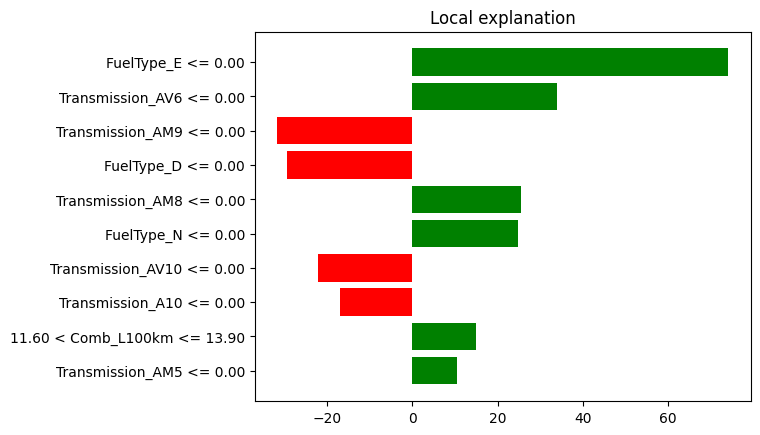

In [69]:
# Visualize the explanation
explanation.as_pyplot_figure()
plt.show()

- The LIME (Local Interpretable Model-agnostic Explanations) visualization for the Gradient Boosting model prediction provides a detailed analysis of the feature contributions to the predicted CO2 emission value of 294.27 g/km. The most significant positive influence comes from the absence of Ethanol as a fuel type (FuelType_E = 0), which increases the CO2 emission value by approximately 83 units. Additionally, the transmission type AM9 has a considerable positive impact, adding around 39 units to the CO2 emissions, while the absence of Natural Gas (FuelType_N = 0) contributes about 40 units.

- On the other hand, several features contribute to reducing the predicted CO2 emissions. The use of Diesel (FuelType_D) decreases the CO2 emission value by approximately 28 units, indicating the efficiency of Diesel engines in producing lower emissions. The vehicle class as a Passenger Van (VehicleClass_Van: Passenger) reduces emissions by around 19 units. Furthermore, specific transmission types, including AS9, AM7, A10, and AV1, also lower the predicted CO2 emissions, with impacts ranging from -11 to -19 units. The transmission type AV10, although listed among the positive contributors, has a relatively minor positive impact of about 10 units. This LIME explanation effectively highlights the factors that influence CO2 emissions, providing a clear understanding of how various features drive the model's predictions.

# Gradient Boosting - ALIBI
<a id = "22"></a>

In [70]:
# Alibi TreeShap açıklayıcıyı oluşturun
explainer = TreeShap(model, model_output='regression')
explainer.fit(X_train)

# https://docs.seldon.io/projects/alibi/en/latest/overview/high_level.html

TreeShap(meta={
  'name': 'TreeShap',
  'type': ['whitebox'],
  'task': 'classification',
  'explanations': ['local', 'global'],
  'params': {
              'model_output': 'raw',
              'summarise_background': False,
              'summarise_result': None,
              'approximate': None,
              'interactions': None,
              'explain_loss': None,
              'algorithm': 'interventional',
              'kwargs': {}}
            ,
  'version': '0.9.6'}
)

In [71]:
sample_idx = 5  # Açıklamayı almak istediğiniz örneğin endeksi
sample = X_test.iloc[[sample_idx]]  # Seçilen örneği alın
sample

ModelYear  EngineSize_L  Cylinders  Comb_L100km  Make_Encoded  \
3047       1999           5.2          8         21.4       0.04648   

      Model_Encoded  FuelType_D  FuelType_E  FuelType_N  FuelType_X  \
3047       0.000111         0.0         0.0         1.0         0.0   

      FuelType_Z  VehicleClass_Compact  VehicleClass_Full-size  \
3047         0.0                   0.0                     0.0   

      VehicleClass_Mid-size  VehicleClass_Minicompact  VehicleClass_Minivan  \
3047                    0.0                       0.0                   0.0   

      VehicleClass_Pickup truck: Small  VehicleClass_Pickup truck: Standard  \
3047                               0.0                                  0.0   

      VehicleClass_SUV: Small  VehicleClass_SUV: Standard  \
3047                      0.0                         0.0   

      VehicleClass_Special purpose vehicle  \
3047                                   0.0   

      VehicleClass_Station wagon: Mid-size  VehicleClass_Station wagon: Small  \
3047                                   0.0                                0.0   

      VehicleClass_Subcompact  VehicleClass_Two-seater  VehicleClass_UL  \
3047                      0.0                      0.0              0.0   

      VehicleClass_Van: Cargo  VehicleClass_Van: Passenger  Transmission_A10  \
3047                      0.0                          1.0               0.0   

      Transmission_A3  Transmission_A4  Transmission_A5  Transmission_A6  \
3047              0.0              1.0              0.0              0.0   

      Transmission_A7  Transmission_A8  Transmission_A9  Transmission_AM5  \
3047              0.0              0.0              0.0               0.0   

      Transmission_AM6  Transmission_AM7  Transmission_AM8  Transmission_AM9  \
3047               0.0               0.0               0.0               0.0   

      Transmission_AS10  Transmission_AS4  Transmission_AS5  Transmission_AS6  \
3047                0.0               0.0               0.0               0.0   

      Transmission_AS7  Transmission_AS8  Transmission_AS9  Transmission_AV  \
3047               0.0               0.0               0.0              0.0   

      Transmission_AV1  Transmission_AV10  Transmission_AV6  Transmission_AV7  \
3047               0.0                0.0               0.0               0.0   

      Transmission_AV8  Transmission_M4  Transmission_M5  Transmission_M6  \
3047               0.0              0.0              0.0              0.0   

      Transmission_M7  
3047              0.0

In [72]:
explanation = explainer.explain(sample)

In [73]:
# Taking SHAP values
shap_values = explanation.shap_values

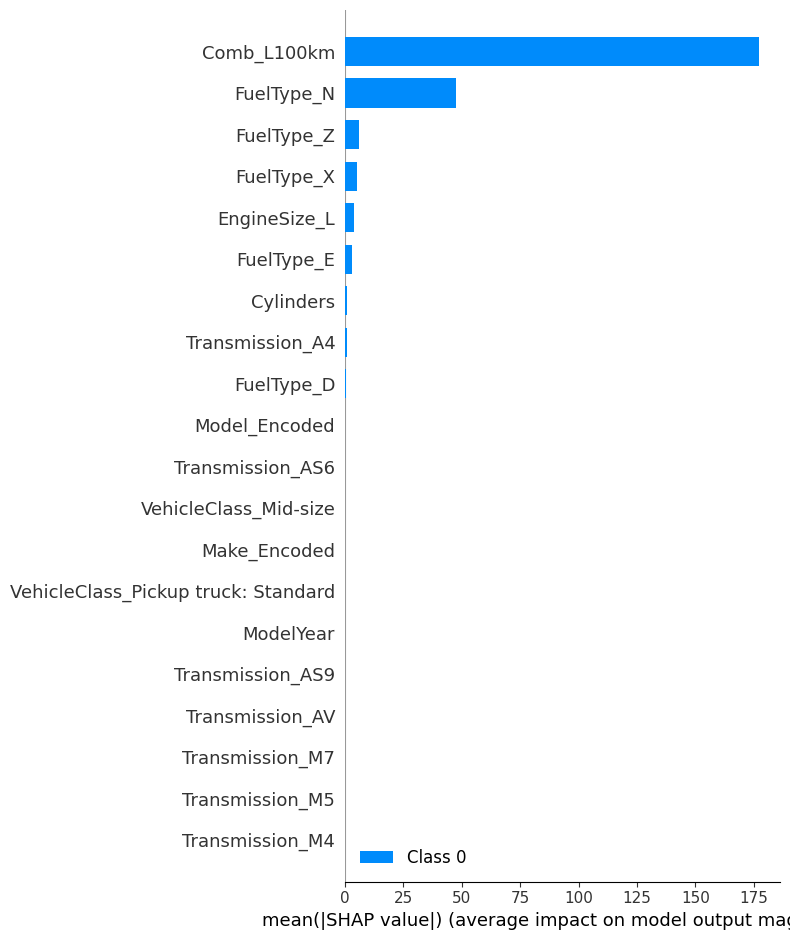

In [74]:
# Visualizing SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# Support Vector Regression
<a id = "23"></a>

- Support Vector Regression (SVR) was employed to predict CO2 emissions based on various vehicle characteristics. SVR is a type of Support Vector Machine (SVM) that is used for regression tasks, aiming to find a function that deviates from the actual observed values by a value no greater than a specified margin. Here’s an analysis of the SVR model and the explanation of its predictions.

In [75]:
# Use StandardScaler to scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
# Create and train the SVR model
model = SVR(kernel='rbf')  # We are using the RBF (Radial Basis Function) kernel
model.fit(X_train_scaled, y_train)

SVR()

In [77]:
# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

In [78]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the performance metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Squared Error (MSE): 307.52
R-squared (R2): 0.93
Mean Absolute Error (MAE): 9.78
Root Mean Squared Error (RMSE): 17.54


Model Performance Metrics:

- Mean Squared Error (MSE): 307.52

    - The MSE represents the average of the squared differences between the predicted and actual values. An MSE of 307.52 indicates that, on average, the squared error is relatively low, suggesting that the model's predictions are fairly close to the actual CO2 emission values.

- R-squared (R2): 0.93

    - The R-squared value of 0.93 indicates that the model explains 93% of the variance in the dependent variable (CO2 emissions). This high R-squared value signifies that the model has a strong ability to capture the relationship between the vehicle features and CO2 emissions, demonstrating good predictive power.

- Mean Absolute Error (MAE): 9.78

    - The MAE measures the average absolute difference between the predicted and actual values. An MAE of 9.78 suggests that, on average, the model's predictions deviate by about 9.78 units from the actual CO2 emission values, highlighting the model's accuracy in prediction.

- Root Mean Squared Error (RMSE): 17.54

    - The RMSE is the square root of the MSE, providing an interpretable metric of prediction error. An RMSE of 17.54 indicates that the model's predictions have an average error of 17.54 units, reinforcing the model's relatively low prediction error and strong performance.

## - Visualising errors for MSE
<a id = "24"></a>

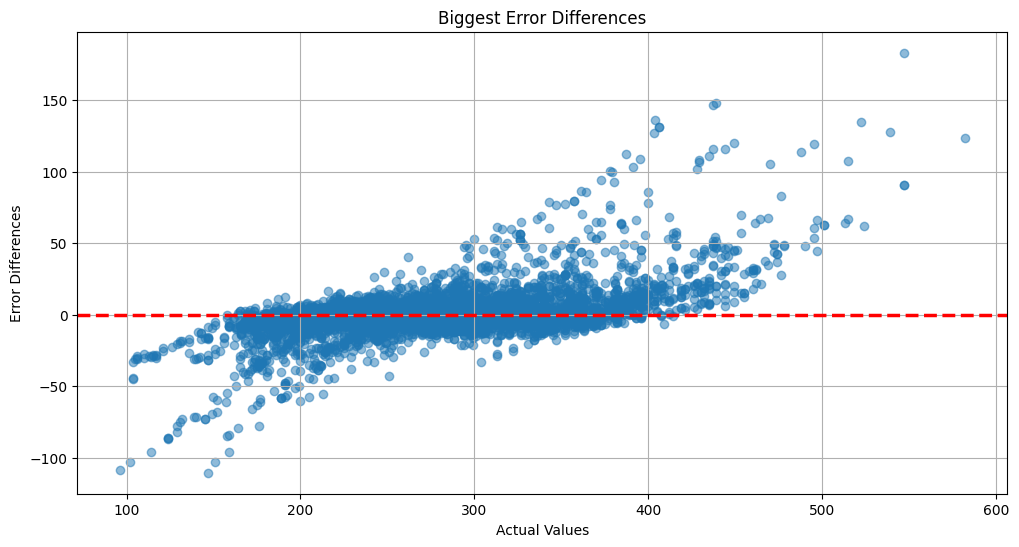

In [79]:
# Calculate the error differences between actual values (y_test) and predicted values (y_pred)
errors = y_test - y_pred

# Calculate MSE by squaring the errors
mse_values = errors ** 2

# Sort MSE values and find the largest errors
sorted_mse_indices = np.argsort(mse_values)[::-1]  # Sorting from largest to smallest

# Getting the actual values corresponding to the largest error differences
worst_errors = errors.iloc[sorted_mse_indices]
corresponding_actual_values = y_test.iloc[sorted_mse_indices]

# Visualising the biggest errors
plt.figure(figsize=(12, 6))
plt.scatter(corresponding_actual_values, worst_errors, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2.5)
plt.xlabel('Actual Values')
plt.ylabel('Error Differences')
plt.title('Biggest Error Differences')
plt.grid(True)
plt.show()

The error differences plot visualizes the discrepancies between the actual and predicted CO2 emission values for the Support Vector Regression (SVR) model. The x-axis represents the actual CO2 emission values, while the y-axis shows the error differences, calculated as the predicted values minus the actual values.

Key Observations:

- Error Distribution:

    - The majority of the predictions cluster around the zero-error line (red dashed line), indicating that the SVR model generally provides accurate predictions. The errors are relatively small for most data points, suggesting that the model performs well across a wide range of CO2 emission values.

- Positive and Negative Errors:

    - There are both positive and negative errors, with the spread of errors increasing as the actual CO2 emission values rise. This pattern indicates that the model's predictions tend to deviate more for vehicles with higher emissions.

- Larger Errors for Higher Emission Values:

    - For actual CO2 emission values above 400 g/km, the error differences become more pronounced. Some predictions have significant positive errors (overestimations) and negative errors (underestimations). This suggests that the model has more difficulty accurately predicting emissions for vehicles with very high CO2 output.

- Consistent Performance for Lower Emission Values:

    - For actual CO2 emission values below 200 g/km, the errors are more tightly clustered around the zero-error line. This consistency indicates that the model is more reliable for predicting lower CO2 emissions.

## - Visualising errors for R2
<a id = "25"></a>

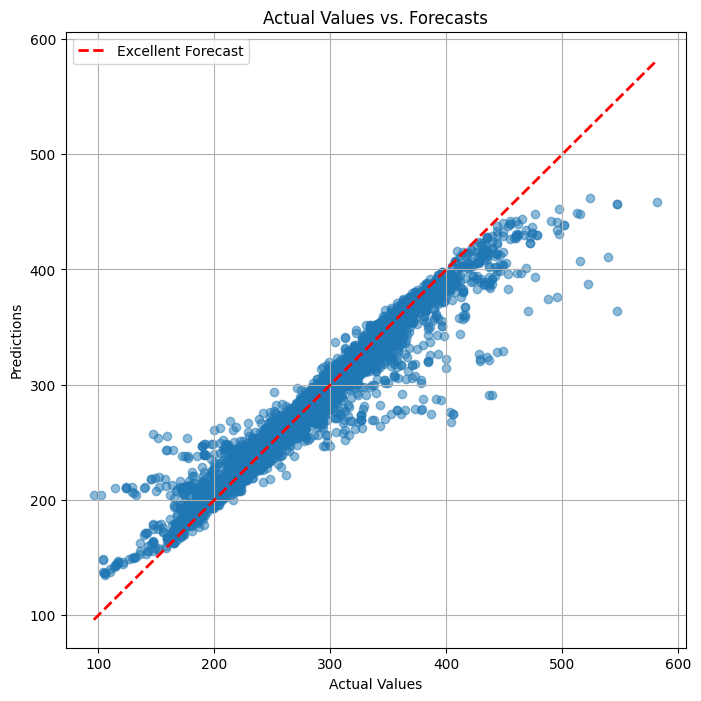

In [80]:
# Visualising the relationship between actual values (y_test) and predicted values (y_pred)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Actual Values vs. Forecasts')
plt.grid(True)

# Drawing a 45-degree line (where there are excellent predictions)
x = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x, x, linestyle='--', color='red', linewidth=2, label='Excellent Forecast')
plt.legend()

plt.show()

The scatter plot compares the actual CO2 emission values to the predicted values from the Support Vector Regression (SVR) model. The red dashed line represents an ideal scenario where predictions perfectly match the actual values, indicating an excellent forecast.

Key Observations:

- Alignment with Ideal Line:

    - Many data points are closely aligned with the red dashed line, indicating that the SVR model's predictions are generally accurate and closely match the actual CO2 emission values. This suggests that the model has a strong predictive performance.

- Deviations from the Ideal Line:

    - While most points are near the ideal line, there are some deviations. The deviations become more noticeable as the actual CO2 emission values increase, indicating that the model's accuracy slightly decreases for higher emission values.

- Spread of Predictions:

    - The spread of predictions widens as the actual CO2 emission values increase. This wider spread suggests greater variability in the model's predictions for vehicles with higher CO2 emissions. Some predictions are significantly higher or lower than the actual values, indicating both overestimations and underestimations.

- Performance at Lower Values:

    - For lower actual CO2 emission values (below 200 g/km), the predictions are more tightly clustered around the ideal line, indicating consistent and accurate performance for vehicles with lower emissions.

# Support Vector Regression - SHAP
<a id = "26"></a>

- SHAP (SHapley Additive exPlanations) values were used to provide global and local explanations for the predictions made by the Support Vector Regression (SVR) model. SHAP values help in understanding the contribution of each feature to the prediction, offering a transparent view of the model's decision-making process.

In [81]:
K = 50  # Number of samples

background_data_summary = shap.sample(X_train_scaled, K)

# Creating an Explainer with summarized background data
explainer = shap.KernelExplainer(model.predict, background_data_summary)

In [82]:
# Calculate SHAP values for the test data

shap_values = explainer.shap_values(X_test_scaled[0])

In [83]:
# Retrieve feature names
feature_names = X_test.columns

# Create a DataFrame to match SHAP values with feature names
shap_df = pd.DataFrame({
    'Feature': feature_names,
    'SHAP Value': shap_values
})

# Display the DataFrame
shap_df

Feature  SHAP Value
0                              ModelYear    2.737129
1                           EngineSize_L   -7.101893
2                              Cylinders   -5.050441
3                            Comb_L100km  -33.353481
4                           Make_Encoded    0.267760
5                          Model_Encoded    0.353204
6                             FuelType_D    0.000000
7                             FuelType_E    1.052504
8                             FuelType_N    0.000000
9                             FuelType_X    0.787539
10                            FuelType_Z   -2.143409
11                  VehicleClass_Compact   -2.571531
12                VehicleClass_Full-size    0.084013
13                 VehicleClass_Mid-size   -0.050050
14              VehicleClass_Minicompact    0.345473
15                  VehicleClass_Minivan   -0.638818
16      VehicleClass_Pickup truck: Small   -0.315378
17   VehicleClass_Pickup truck: Standard    0.000000
18               VehicleClass_SUV: Small   -0.531011
19            VehicleClass_SUV: Standard   -0.135247
20  VehicleClass_Special purpose vehicle   -0.697143
21  VehicleClass_Station wagon: Mid-size    0.000000
22     VehicleClass_Station wagon: Small    0.077472
23               VehicleClass_Subcompact    0.403496
24               VehicleClass_Two-seater    0.104572
25                       VehicleClass_UL    0.000000
26               VehicleClass_Van: Cargo   -0.689665
27           VehicleClass_Van: Passenger   -0.966429
28                      Transmission_A10    0.000000
29                       Transmission_A3    1.057741
30                       Transmission_A4    3.648642
31                       Transmission_A5    0.191739
32                       Transmission_A6    0.000000
33                       Transmission_A7   -0.077322
34                       Transmission_A8    0.000000
35                       Transmission_A9    0.000000
36                      Transmission_AM5    0.000000
37                      Transmission_AM6    0.000000
38                      Transmission_AM7    0.079913
39                      Transmission_AM8    0.000000
40                      Transmission_AM9    0.000000
41                     Transmission_AS10   -0.325554
42                      Transmission_AS4    0.000000
43                      Transmission_AS5    0.046338
44                      Transmission_AS6   -1.041590
45                      Transmission_AS7   -0.274155
46                      Transmission_AS8   -0.038281
47                      Transmission_AS9   -0.564163
48                       Transmission_AV   -0.053010
49                      Transmission_AV1    0.000000
50                     Transmission_AV10    0.000000
51                      Transmission_AV6    0.000000
52                      Transmission_AV7   -0.351008
53                      Transmission_AV8    0.275152
54                       Transmission_M4    0.000000
55                       Transmission_M5   -0.663736
56                       Transmission_M6   -0.119649
57                       Transmission_M7   -0.498518

In [84]:
# creating a visual representation of the SHAP values for a single prediction

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test_scaled[0], feature_names=feature_names)

- **Base Value:** The expected model output, which is usually the mean of the model's predictions on the training dataset.

In [85]:
expected_value = explainer.expected_value
print("Base Value:", expected_value)

Base Value: 277.65799961004427


- **Contributions**: For each feature, it shows how much that feature contributes to the difference between the model's output and the base value. A positive contribution indicates that the feature is pushing the model's output higher, while a negative contribution indicates that the feature is pushing it lower.

In [86]:
feature_contributions = shap_values
print("Feature Contributions:", feature_contributions)

Feature Contributions: [  2.73712852  -7.10189285  -5.05044141 -33.35348115   0.26776008
   0.35320412   0.           1.05250388   0.           0.78753867
  -2.14340899  -2.5715315    0.08401285  -0.05005023   0.34547325
  -0.63881792  -0.31537839   0.          -0.53101081  -0.13524711
  -0.69714335   0.           0.07747175   0.40349592   0.10457184
   0.          -0.68966519  -0.96642944   0.           1.05774109
   3.64864226   0.19173913   0.          -0.07732181   0.
   0.           0.           0.           0.07991349   0.
   0.          -0.32555363   0.           0.04633839  -1.0415901
  -0.27415471  -0.03828131  -0.5641631   -0.05300998   0.
   0.           0.          -0.3510084    0.27515204   0.
  -0.66373551  -0.11964946  -0.49851831]


- **Overall Impact**: The overall impact of all features on the model's prediction for a specific instance.

In [87]:
overall_impact = feature_contributions.sum() + expected_value
print("Overall Impact:", overall_impact)

Overall Impact: 230.91920221369253


- **Output Value**: The final model output for that instance.

In [88]:
output_value = expected_value + overall_impact
print("Output Value:", output_value)

Output Value: 508.5772018237368


In [89]:
# Extending Shapley values to other data points
shap_values = np.array([shap_values] * len(X_test_scaled))

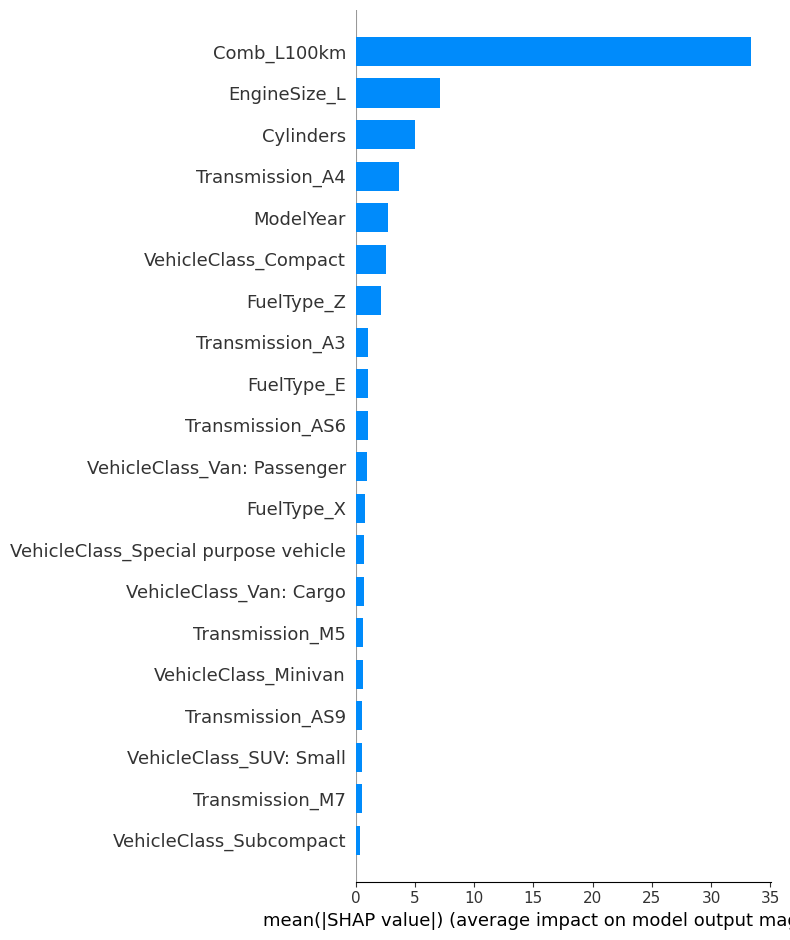

In [90]:
# Summarize Shapley values
shap.summary_plot(shap_values, X_test_scaled, plot_type='bar', feature_names=X.columns)

# Support Vector Regression - LIME
<a id = "27"></a>

- LIME (Local Interpretable Model-agnostic Explanations) was used to provide local explanations for individual predictions made by the Support Vector Regression (SVR) model. LIME helps identify the key features influencing specific predictions, offering valuable insights into the model's decision-making process.

In [91]:
# Create a LIME explainer
explainer_lime = LimeTabularExplainer(X_train_scaled, mode="regression", feature_names=X.columns)

In [92]:
# Choose a random instance from the test data to explain
instance_to_explain = X_test_scaled[25]

In [93]:
# Explain the prediction made by the SVR model for the chosen instance
explanation = explainer_lime.explain_instance(instance_to_explain, model.predict)

In [94]:
# Display the explanation
explanation.show_in_notebook()

- The LIME (Local Interpretable Model-agnostic Explanations) visualization for the Support Vector Regression (SVR) model prediction shows how different features contribute to the predicted CO2 emission value of 312.02 g/km. The plot illustrates both positive and negative impacts of various features on the prediction.

- The most significant positive contributors are transmission types and fuel type. Specifically, Transmission_AV6 has the largest positive impact, increasing the predicted CO2 emission value by 39.18 units. This is followed by the use of Ethanol (FuelType_E), which increases the prediction by 38.45 units, and other transmission types such as Transmission_AV7 and Transmission_AM6, which add 38.04 and 30.91 units, respectively.

- Conversely, the Vehicle Class (Van: Passenger) has the most substantial negative impact, reducing the predicted CO2 emission value by 27.77 units. This suggests that passenger vans in this dataset are associated with lower CO2 emissions compared to other vehicle types. Other transmission types such as Transmission_AV8, Transmission_AV10, and Transmission_M4 also contribute positively to the emissions, but to a lesser extent, while VehicleClass_Special purpose vehicle slightly reduces the emissions by 6 units.

- Overall, the LIME explanation provides a clear view of which features increase or decrease the predicted CO2 emissions for this specific instance. The analysis highlights the critical role of transmission types and fuel type in driving emissions higher, while certain vehicle classes, particularly passenger vans, help in reducing the emissions. This detailed insight helps in understanding the model's decision-making process and validates its predictions by showing how individual features contribute to the overall prediction.

# CONCLUSION
<a id = "28"></a>

- This study aimed to estimate carbon emissions based on vehicle characteristics using datasets from Natural Resources Canada. By employing various classical machine learning models and explainable artificial intelligence (XAI) methods, the study sought to understand the key vehicle features influencing emissions and provide insights for decision-makers.

- The exploratory analysis revealed a positive relationship between the number of cylinders and fuel consumption, which in turn increased carbon emissions. While fuel types did not show significant differences in CO2 emissions, premium gasoline had a wider range of emission values. Natural gas vehicles displayed a narrower, more predictable range of emissions. High-end brands like Lamborghini, Bugatti, Ferrari, and Bentley showed higher emissions due to their larger engine sizes and higher fuel consumption.

- The study found that advancements in technology have led to a decrease in emissions, particularly noticeable in vehicles manufactured from 2010 onwards. This trend indicates that manufacturers are increasingly focusing on reducing carbon emissions.

- Machine learning models were evaluated using metrics such as MSE, R2, MAE, EVS, and RMSE, showing satisfactory predictive performance. Combined Fuel Consumption emerged as the most significant feature influencing emissions across all models, with other features like fuel type, transmission type, and model year also playing roles.

- XAI methods, particularly SHAP and LIME, were used to interpret the model predictions. SHAP values consistently highlighted Combined Fuel Consumption as the dominant factor. LIME provided clear visualizations of the impact of various features, with Ethanol fuel type and AV10 transmission showing significant effects in some samples. ALIBI and SHAP visualizations, especially beeswarm plots, offered detailed insights into the positive and negative impacts of features on emissions.

- In conclusion, the study demonstrated that LIME and SHAP (using beeswarm plots) are the most effective XAI methods for providing clear and informative explanations for decision-makers. These methods allow for a better understanding of the factors driving carbon emissions, aiding in the development of strategies to reduce vehicle emissions.

# ***Ahmet Erdem YENIAY***

- If you like it, thank you for you ***upvotes***.
- If you have any question, I will happy to hear it